### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

caminho_base = "./base-de-dados-challenge-1/"  # Note a barra normal (funciona em todos)
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Lista para armazenar as tabela (DataFrames) de cada loja
lista_tabelas = []

# Loop para ler cada arquivo e adicionar a tabela à lista
for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)  # Usando os.path.join()
    df_loja = pd.read_csv(caminho_completo)
    lista_tabelas.append(df_loja)

# Concatena toda as tabelas na lista em uma única tabela chamada 'lojas'
lojas = pd.concat(lista_tabelas, ignore_index=True)

# mostra as 4 primeiras linhas da tabela concatenada com as informações de todas as 4 lojas
lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 1. Faturamento

### 1.1 - Faturamento total por loja

In [2]:
import pandas as pd
import os

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

lista_tabelas = []

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    # Extrai o nome da loja do nome do arquivo
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja  # Cria a coluna 'Loja'
    lista_tabelas.append(df_loja)

lojas = pd.concat(lista_tabelas, ignore_index=True)

# Calcula o faturamento por loja
faturamento_por_loja = lojas.groupby('Loja')['Preço'].sum().reset_index()

# Formata o faturamento para exibição (CORREÇÃO AQUI)
def formatar_moeda_br(valor):
    valor_formatado = f'R$ {valor:,.2f}'
    valor_formatado = valor_formatado.replace('.', '#')  # Temporariamente substitui o ponto
    valor_formatado = valor_formatado.replace(',', '.')  # Substitui a vírgula
    valor_formatado = valor_formatado.replace('#', ',')  # Restaura o ponto
    return valor_formatado

faturamento_por_loja['Faturamento'] = faturamento_por_loja['Preço'].apply(formatar_moeda_br)

# Remove a coluna 'Preço'
faturamento_por_loja = faturamento_por_loja.drop(columns=['Preço'])

# Exibe o resultado
print("Faturamento por Loja:")
print(faturamento_por_loja.to_string(index=False))

Faturamento por Loja:
  Loja     Faturamento
Loja_1 R$ 1.534.509,12
Loja_2 R$ 1.488.459,06
Loja_3 R$ 1.464.025,03
Loja_4 R$ 1.384.497,58


### 1.2 Faturamento - Gráfico do faturamento total por loja

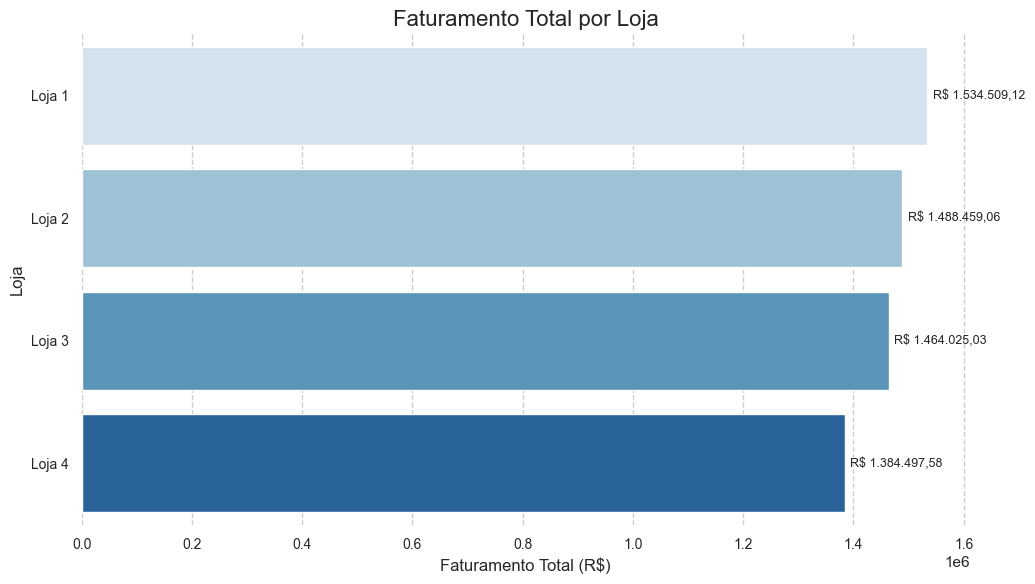

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Seu código para calcular o faturamento (já fornecido anteriormente)
caminho_base = './base-de-dados-challenge-1/'
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']
resultados = [pd.read_csv(caminho_base + arquivo) for arquivo in arquivos_lojas]
nomes_lojas = [arquivo.split('.')[0].replace('_', ' ').title() for arquivo in arquivos_lojas]
faturamentos = [df['Preço'].sum() for df in resultados]
dados_resumo = {'Loja': nomes_lojas, 'Faturamento Total': faturamentos}
df_resumo = pd.DataFrame(dados_resumo)

def formatar_moeda_br(valor):
    return f'R$ {valor:_.2f}'.replace('.', ',').replace('_', '.')

df_resumo['Faturamento Total Formatado'] = df_resumo['Faturamento Total'].apply(formatar_moeda_br)
df_resumo['Loja'] = df_resumo['Loja'].astype(str)

# Gráfico de barras horizontais com Seaborn e paleta "Set2" (CORREÇÃO DO AVISO)
sns.set_theme(style="whitegrid")

# Definindo o estilo do gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras horizontais
sns.barplot(y='Loja', x='Faturamento Total', data=df_resumo, palette="Blues", hue='Loja', legend=False)

# Formata os valores do eixo x para moeda
plt.xlabel('Faturamento Total (R$)', fontsize=12)
plt.ylabel('Loja', fontsize=12)
plt.title('Faturamento Total por Loja', fontsize=16)

# Formata os ticks do eixo x para moeda
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(bottom=True, left=True)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()

# Adiciona os valores ao lado das barras
for i, v in enumerate(df_resumo['Faturamento Total']):
    plt.text(v + 10000, i, f'R$ {v:_.2f}'.replace('.', ',').replace('_', '.'), va='center', fontsize=9)

plt.show()

# 2. Vendas por Categoria

### 2.1 - Faturamento por categoria de produto

In [ ]:
import pandas as pd
import os

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

lista_tabelas = []

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    lista_tabelas.append(df_loja)

df_consolidado = pd.concat(lista_tabelas, ignore_index=True)

# Calcula o faturamento por categoria
faturamento_por_categoria = df_consolidado.groupby('Categoria do Produto')['Preço'].sum().reset_index()

# 2. Formatar as colunas de valor como moeda
# Formata o faturamento para exibição
def formatar_moeda_br(valor):
    valor_formatado = f'R$ {valor:,.2f}'
    valor_formatado = valor_formatado.replace('.', '#')  # Temporariamente substitui o ponto
    valor_formatado = valor_formatado.replace(',', '.')  # Substitui a vírgula
    valor_formatado = valor_formatado.replace('#', ',')  # Restaura o ponto
    return valor_formatado

# Ordena o DataFrame pelo faturamento (coluna 'Preço') em ordem decrescente
faturamento_por_categoria_ordenado = faturamento_por_categoria.sort_values(by='Preço', ascending=False)

# Aplica a formatação da moeda na coluna 'Faturamento'
faturamento_por_categoria_ordenado['Faturamento'] = faturamento_por_categoria_ordenado['Preço'].apply(formatar_moeda_br)

# Remove a coluna 'Preço'
faturamento_por_categoria_ordenado = faturamento_por_categoria_ordenado.drop(columns=['Preço'])

# Exibe o resultado ordenado
print("Faturamento por Categoria (do maior para o menor):")
print(faturamento_por_categoria_ordenado.to_string(index=False))

Faturamento por Categoria (do maior para o menor):
 Categoria do Produto     Faturamento
          eletronicos R$ 2.214.099,72
     eletrodomesticos R$ 1.766.337,03
               moveis R$ 1.010.214,00
instrumentos musicais   R$ 465.029,67
      esporte e lazer   R$ 190.635,39
           brinquedos    R$ 98.140,86
utilidades domesticas    R$ 76.773,38
               livros    R$ 50.260,74


### 2.2 - Vendas por categoria - Gráfico do faturamento por categoria de produto

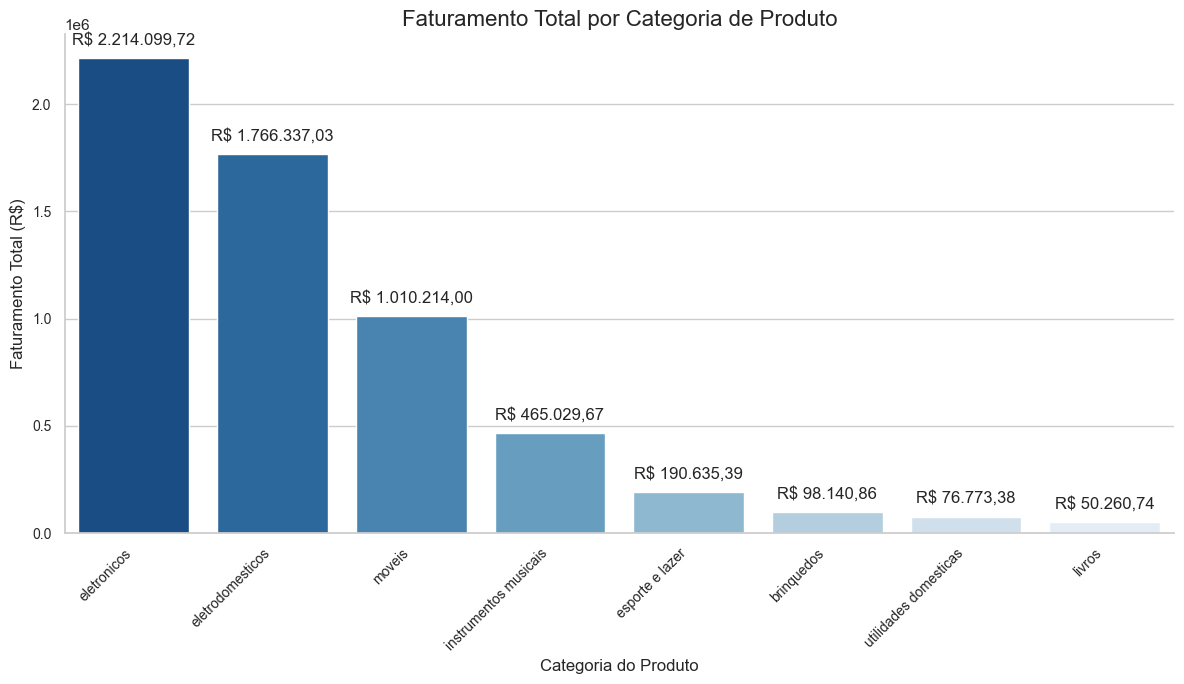

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

lista_tabelas = []

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    lista_tabelas.append(df_loja)

df_consolidado = pd.concat(lista_tabelas, ignore_index=True)

# Calcular o faturamento total por categoria
venda_por_categoria = df_consolidado.groupby('Categoria do Produto')['Preço'].sum().reset_index()
venda_por_categoria.columns = ['Categoria do Produto', 'Faturamento Total']

# Ordenando o DataFrame pelo faturamento (do maior para o menor)
df_ordenado_seaborn = venda_por_categoria.sort_values(by='Faturamento Total', ascending=False)

# Criar o estilo do gráfico
sns.set_theme(style="whitegrid")

# Tamanho do gráfico
plt.figure(figsize=(12, 7))

# Definir a paleta de cores com base no número de categorias
num_categorias = len(df_ordenado_seaborn)
cores = sns.color_palette("Blues_r", n_colors=num_categorias)

# Criar o gráfico de barras com a paleta ordenada
sns.barplot(x='Categoria do Produto', y='Faturamento Total', data=df_ordenado_seaborn, palette=cores, hue='Categoria do Produto', legend=False)

# Adicionar os valores acima das barras (usando plt.text para mais controle)
for i, v in enumerate(df_ordenado_seaborn['Faturamento Total']):
    plt.text(i, v + 50000, f'R$ {v:_.2f}'.replace('.', ',').replace('_', '.'), ha='center', va='bottom')

# Adiciona formatação de moeda ao eixo y
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
plt.title('Faturamento Total por Categoria de Produto', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()

# Exibe o gráfico
plt.show()

### 2.3 - Vendas por Categoria - Valor de faturamento por categoria e por loja

Contempla as 8 categorias existentes

In [11]:
import pandas as pd
import os
import warnings
import numpy as np
warnings.filterwarnings("ignore", message="set_ticklabels()")

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']
lista_tabelas = []

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

lojas = pd.concat(lista_tabelas, ignore_index=True)

# Estimar o valor de vendas por categoria e loja
vendas_por_categoria_loja = lojas.groupby(['Categoria do Produto', 'Loja'])['Preço'].sum().unstack(fill_value=0)
vendas_por_categoria_loja_indice = vendas_por_categoria_loja.index.rename('Categoria do Produto')
vendas_por_categoria_loja = vendas_por_categoria_loja.set_index(vendas_por_categoria_loja_indice)

# Identificar as 8 categorias mais vendidas (usando uma lógica anterior)
venda_por_categoria = lojas.groupby('Categoria do Produto')['Preço'].sum().reset_index()
venda_por_categoria = venda_por_categoria.rename(columns={'Preço': 'Valor Faturado'})
top_8_categorias = venda_por_categoria.sort_values(by='Valor Faturado', ascending=False).head(8)

# Filtrar o DataFrame de vendas por loja para incluir apenas as 8 categorias mais vendidas
top_8_vendas_por_loja = pd.merge(top_8_categorias[['Categoria do Produto']], vendas_por_categoria_loja, on='Categoria do Produto', how='left')
top_8_vendas_por_loja = top_8_vendas_por_loja.set_index('Categoria do Produto')

# Formatar as colunas de valor como moeda
def formatar_moeda_br(valor):
    valor_formatado = f'R$ {valor:,.2f}'
    valor_formatado = valor_formatado.replace('.', '#')  # Temporariamente substitui o ponto
    valor_formatado = valor_formatado.replace(',', '.')  # Substitui a vírgula
    valor_formatado = valor_formatado.replace('#', ',')  # Restaura o ponto
    return valor_formatado

# Identifique as colunas de valor
colunas_para_formatar = top_8_vendas_por_loja.columns.tolist()
if 'Total' in colunas_para_formatar:
    colunas_para_formatar.remove('Total')

# Formate cada coluna de valor (isso já está sendo feito corretamente)
for coluna in colunas_para_formatar:
    top_8_vendas_por_loja[coluna] = top_8_vendas_por_loja[coluna].apply(formatar_moeda_br)

# Adiciona a coluna de total (soma do valor faturado de cada categoria em todas as lojas)
# Primeiro, removemos a formatação para realizar a soma corretamente
valores_para_soma = top_8_vendas_por_loja[colunas_para_formatar].replace({r'R\$ ': '', r'\.': '', ',': '.'}, regex=True).astype(float)
total_por_categoria = valores_para_soma.sum(axis=1)

# Depois, formatamos a coluna 'Total' como moeda
top_8_vendas_por_loja['Total'] = total_por_categoria.apply(formatar_moeda_br)

# Exibe o resultado para as 8 categorias de produtos
print("\nValor Faturado por Loja nas 8 Categorias de Produtos:")
print(top_8_vendas_por_loja)


Valor Faturado por Loja nas 8 Categorias de Produtos:
                              Loja_1         Loja_2         Loja_3  \
Categoria do Produto                                                 
eletronicos            R$ 572.659,23  R$ 547.773,71  R$ 547.699,92   
eletrodomesticos       R$ 484.913,36  R$ 464.758,13  R$ 438.984,89   
moveis                 R$ 250.178,11  R$ 235.234,68  R$ 268.095,56   
instrumentos musicais  R$ 121.731,69  R$ 139.987,03  R$ 103.174,45   
esporte e lazer         R$ 52.387,55   R$ 46.326,09   R$ 47.456,10   
brinquedos              R$ 23.993,78   R$ 21.262,21   R$ 25.869,20   
utilidades domesticas   R$ 16.931,48   R$ 19.662,86   R$ 20.080,21   
livros                  R$ 11.713,92   R$ 13.454,35   R$ 12.664,70   

                              Loja_4            Total  
Categoria do Produto                                   
eletronicos            R$ 545.966,86  R$ 2.214.099,72  
eletrodomesticos       R$ 377.680,65  R$ 1.766.337,03  
moveis              

### 2.4 - Vendas por Categoria - Gráfico do faturamento por categoria e por loja

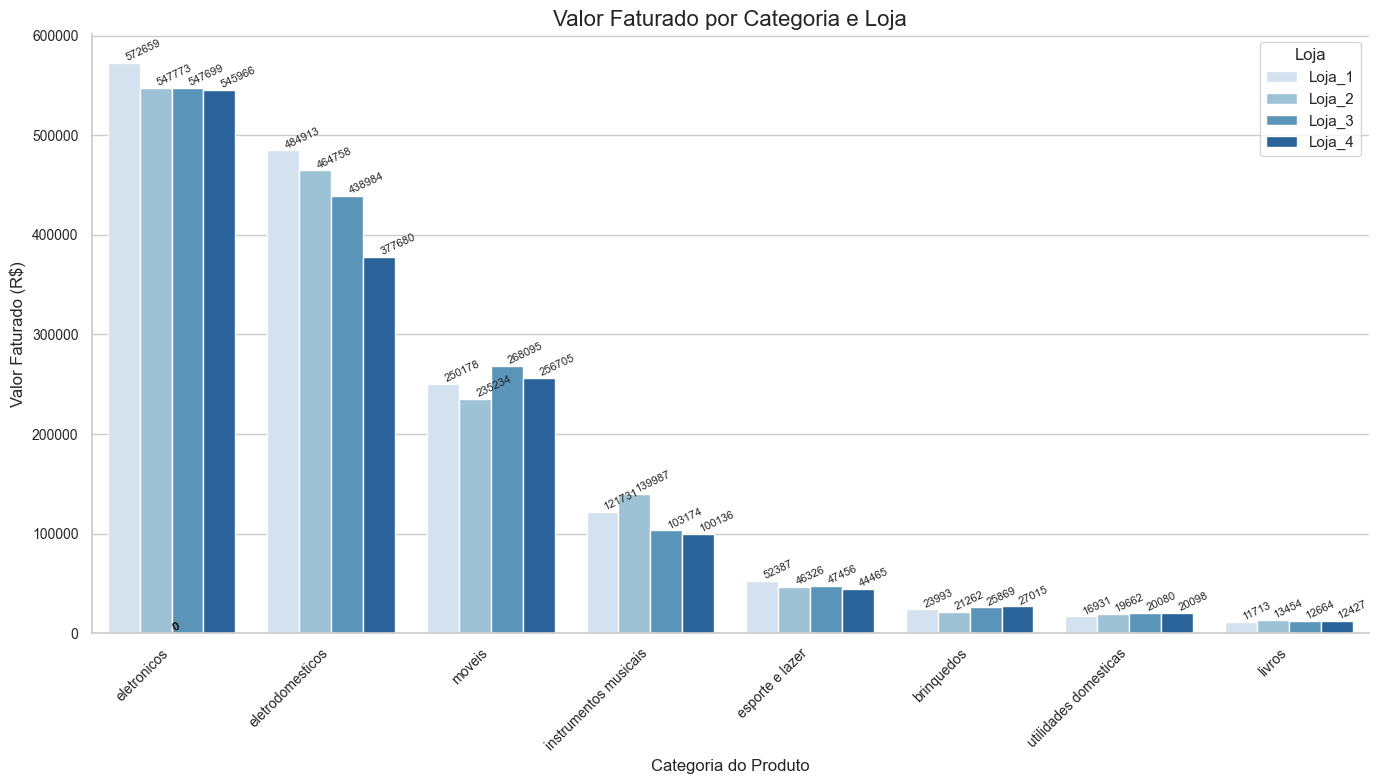

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define o caminho base para os arquivos
caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Lista para armazenar os DataFrames de cada loja
lista_tabelas = []

# Loop para ler cada arquivo e adicionar a tabela à lista
for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

# Concatena todas as tabelas em uma única tabela chamada 'lojas'
lojas = pd.concat(lista_tabelas, ignore_index=True)

# Calcular o valor de vendas por categoria e por loja
vendas_por_categoria_loja = lojas.groupby(by=['Categoria do Produto', 'Loja'])['Preço'].sum().unstack(fill_value=0)
vendas_por_categoria_loja.index.name = 'Categoria do Produto'

# Identificar as 8 categorias mais vendidas
venda_por_categoria = lojas.groupby('Categoria do Produto')['Preço'].sum().reset_index()
venda_por_categoria.columns = ['Categoria do Produto', 'Valor Faturado']
top_8_categorias = venda_por_categoria.sort_values(by='Valor Faturado', ascending=False).head(8)

# Filtrar o DataFrame de vendas por loja para incluir as 8 categorias mais vendidas
top_8_vendas_por_loja = pd.merge(top_8_categorias['Categoria do Produto'], vendas_por_categoria_loja, on='Categoria do Produto', how='left').set_index('Categoria do Produto')

# Preparar os dados para o gráfico de barras com Seaborn
df_seaborn = top_8_vendas_por_loja.reset_index()
df_melted = pd.melt(df_seaborn,
                    id_vars='Categoria do Produto',
                    value_vars=df_seaborn.columns[1:],
                    var_name='Loja',
                    value_name='Valor Faturado')

# Adicionar o estilo do gráfico
sns.set_theme(style="whitegrid")

# Definir o tamanho da figura
plt.figure(figsize=(14, 8))

# Criar o gráfico de barras agrupadas
ax = sns.barplot(x='Categoria do Produto', y='Valor Faturado', hue='Loja', data=df_melted, palette="Blues")  # Usando uma paleta de cores

# Adicionar o valor faturado no topo de cada barra
for p in ax.patches:
    altura = p.get_height()
    x_pos = p.get_x() + p.get_width() / 2.
    y_pos = altura + 0.5  # Adiciona um pequeno espaço acima da barra
    ax.text(x_pos, y_pos, f'{int(altura)}', ha='left', va='bottom', fontsize=8, rotation=25) # Adicionando rotation=25

# Adicionando título e rótulos
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Valor Faturado (R$)', fontsize=12)
plt.title('Valor Faturado por Categoria e Loja', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Remover as spines superior e direita
sns.despine()

plt.tight_layout()
plt.show()

### 2.5 - Vendas por categoria - Volume de vendas por categoria e por loja

In [22]:
import pandas as pd
import os

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

lista_tabelas = []

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    # Extrai o nome da loja do nome do arquivo
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja  # Cria a coluna 'Loja'
    lista_tabelas.append(df_loja)

lojas = pd.concat(lista_tabelas, ignore_index=True)

# Calcula a quantidade de vendas por categoria por loja
vendas_por_categoria_loja = lojas.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade de Vendas')

# Transforma a tabela para o formato desejado
vendas_por_categoria_pivot = vendas_por_categoria_loja.pivot_table(index='Categoria do Produto', columns='Loja', values='Quantidade de Vendas', fill_value=0)

# Converte os valores para inteiro
vendas_por_categoria_pivot = vendas_por_categoria_pivot.astype(int)

# Adiciona a coluna de total (soma das vendas de cada categoria em todas as lojas)
vendas_por_categoria_pivot['Total'] = vendas_por_categoria_pivot.sum(axis=1)

# Adiciona a linha de total (soma das vendas de todas as categorias em cada loja)
total_por_loja = vendas_por_categoria_pivot.sum(axis=0).rename('Total')
vendas_por_categoria_pivot = pd.concat([vendas_por_categoria_pivot, pd.DataFrame(total_por_loja, columns=['Total']).T])

# Exibe o resultado
print("Quantidade de Vendas por Categoria por Loja:")
print(vendas_por_categoria_pivot.to_string())

Quantidade de Vendas por Categoria por Loja:
Loja                   Loja_1  Loja_2  Loja_3  Loja_4  Total
brinquedos                324     313     315     338   1290
eletrodomesticos          312     305     278     254   1149
eletronicos               448     422     451     451   1772
esporte e lazer           284     275     277     277   1113
instrumentos musicais     182     224     177     170    753
livros                    173     197     185     187    742
moveis                    465     442     499     480   1886
utilidades domesticas     171     181     177     201    730
Total                    2359    2359    2359    2358   9435


### 2.6 - Vendas por Categoria - Gráfico do volume de vendas por categoria e por loja

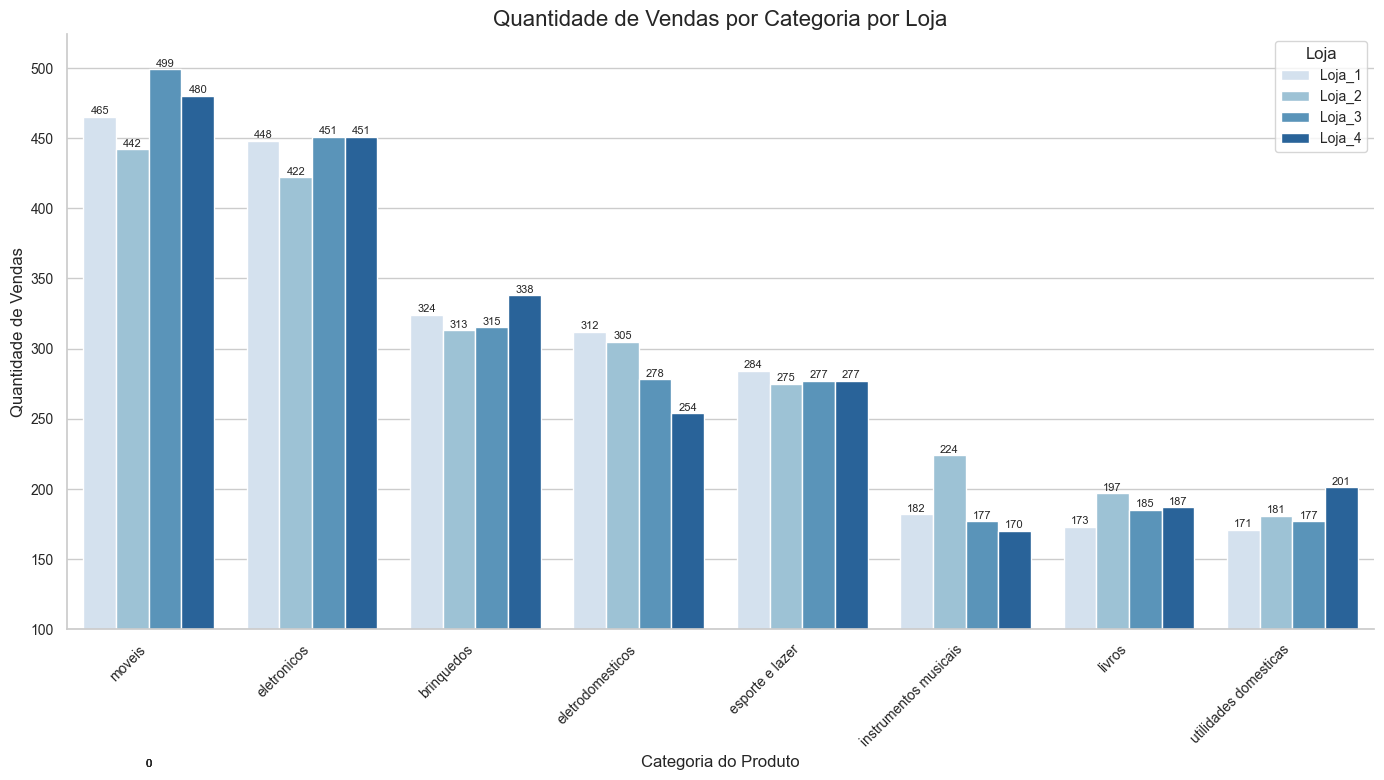

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define o caminho base para os arquivos
caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Lista para armazenar os DataFrames de cada loja
lista_tabelas = []

# Loop para ler cada arquivo e adicionar a tabela à lista
for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

# Concatena todas as tabelas em uma única tabela chamada 'lojas'
lojas = pd.concat(lista_tabelas, ignore_index=True)

# Calcular a quantidade de vendas por categoria e loja
vendas_por_categoria_loja = lojas.groupby(['Categoria do Produto', 'Loja']).size().unstack(fill_value=0)

# Ordenar as categorias pela soma das vendas em todas as lojas (do maior para o menor)
vendas_totais_por_categoria = vendas_por_categoria_loja.sum(axis=1).sort_values(ascending=False)
vendas_por_categoria_pivot_ordenado = vendas_por_categoria_loja.loc[vendas_totais_por_categoria.index]

# Preparar os dados para Seaborn usando melt
df_melted = pd.melt(vendas_por_categoria_pivot_ordenado.reset_index(),
                    id_vars='Categoria do Produto',
                    value_vars=vendas_por_categoria_pivot_ordenado.columns,
                    var_name='Loja',
                    value_name='Quantidade de Vendas')

# Configurar o estilo do Seaborn
sns.set_theme(style="whitegrid")

# Configurar o tamanho da figura
plt.figure(figsize=(14, 8))

# Criar o gráfico de barras agrupadas com Seaborn
ax = sns.barplot(x='Categoria do Produto', y='Quantidade de Vendas', hue='Loja', data=df_melted, palette="Blues")

# Adicionar a quantidade vendida no topo de cada barra
for p in ax.patches:
    altura = p.get_height()
    x_pos = p.get_x() + p.get_width() / 2.
    y_pos = altura + 0.5  # Adiciona um pequeno espaço acima da barra
    ax.text(x_pos, y_pos, f'{int(altura)}', ha='center', va='bottom', fontsize=8)

# Adicionar rótulos e título
plt.xlabel("Categoria do Produto", fontsize=12)
plt.ylabel("Quantidade de Vendas", fontsize=12)
plt.title("Quantidade de Vendas por Categoria por Loja", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Definir o limite inferior do eixo Y
plt.ylim(bottom=100)

# Adicionar legenda
plt.legend(title='Loja', fontsize=10)

# Remover spines desnecessárias
sns.despine()

# Ajustar o layout para evitar cortes
plt.tight_layout()

# Exibir o gráfico
plt.show()

### 2.7 - Vendas por Categoria - Faturamento e volume de vendas da categoria eletrodomésticos por loja

Análise isolada do faturamento e quantidade vendida de produtos da categoria eletrodomésticos por loja, porque representa a categoria de maior valor agregado

In [24]:
import pandas as pd
import os
import numpy as np

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

lista_tabelas = []

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    # Extrai o nome da loja do nome do arquivo
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja  # Cria a coluna 'Loja'
    lista_tabelas.append(df_loja)

lojas = pd.concat(lista_tabelas, ignore_index=True)

# Filtra o DataFrame para manter apenas a categoria 'eletrodomesticos'
lojas_eletrodomesticos = lojas[lojas['Categoria do Produto'] == 'eletrodomesticos']

# Calcula a quantidade de vendas por loja para a categoria eletrodomesticos
vendas_eletrodomesticos_por_loja = lojas_eletrodomesticos.groupby('Loja').size().reset_index(name='Quantidade de Vendas')

# Calcula o faturamento por loja para a categoria eletrodomesticos
faturamento_eletrodomesticos_por_loja = lojas_eletrodomesticos.groupby('Loja')['Preço'].sum().reset_index(name='Faturamento')

# Formata a coluna de Faturamento para moeda Real do Brasil
faturamento_eletrodomesticos_por_loja['Faturamento'] = faturamento_eletrodomesticos_por_loja['Faturamento'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', '#TEMP#').replace('.', ',').replace('#TEMP#', '.'))

# Exibe os resultados
print("Quantidade de Vendas de Eletrodomésticos por Loja:")
print(vendas_eletrodomesticos_por_loja.to_string(index=False))

print("\nFaturamento de Eletrodomésticos por Loja:")
print(faturamento_eletrodomesticos_por_loja.to_string(index=False))

Quantidade de Vendas de Eletrodomésticos por Loja:
  Loja  Quantidade de Vendas
Loja_1                   312
Loja_2                   305
Loja_3                   278
Loja_4                   254

Faturamento de Eletrodomésticos por Loja:
  Loja   Faturamento
Loja_1 R$ 484.913,36
Loja_2 R$ 464.758,13
Loja_3 R$ 438.984,89
Loja_4 R$ 377.680,65


### 2.8 - Vendas por Categoria - Gráfico do faturamento e do volume de vendas de eletrodomésticos por loja

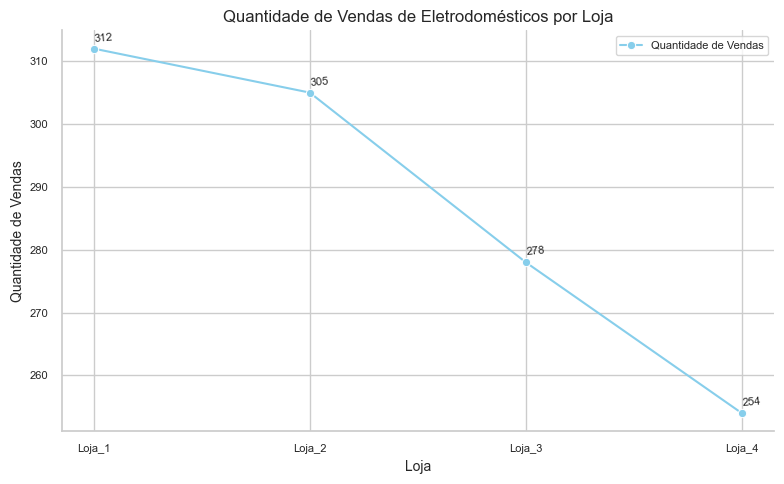

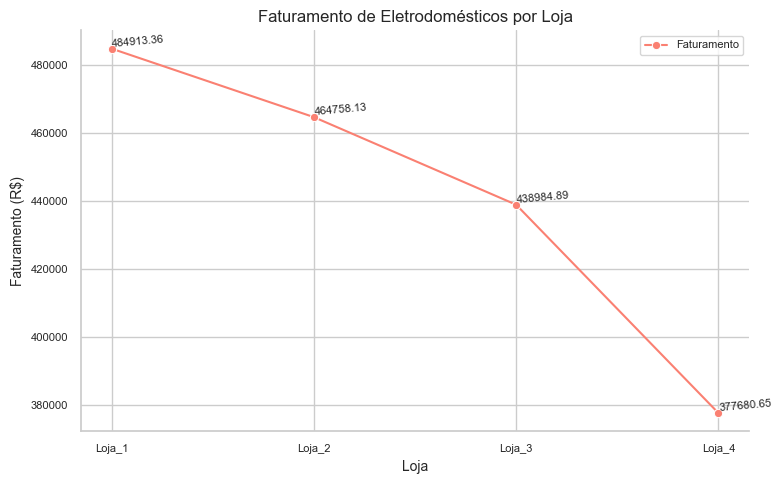

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define o caminho base para os arquivos
caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Lista para armazenar os DataFrames de cada loja
lista_tabelas = []

# Loop para ler cada arquivo e adicionar a tabela à lista
for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

# Concatena todas as tabelas em uma única tabela chamada 'lojas'
lojas = pd.concat(lista_tabelas, ignore_index=True)

# Filtrar os dados para a categoria 'eletrodomesticos'
eletrodomesticos = lojas[lojas['Categoria do Produto'] == 'eletrodomesticos']

# Agrupar por loja e calcular quantidade de vendas e faturamento
data_plot = eletrodomesticos.groupby('Loja').agg(
    Quantidade_de_Vendas=('Preço', 'count'),
    Faturamento=('Preço', 'sum')
).reset_index()

# Gráfico 1: Quantidade de Vendas

# Configurar o estilo do Seaborn
sns.set_theme(style="whitegrid")

# Configurar o tamanho da figura
plt.figure(figsize=(8, 5))

# Cria a linha para quantidade de vendas com Seaborn
sns.lineplot(x='Loja', y='Quantidade_de_Vendas', marker='o', data=data_plot, color='skyblue', label='Quantidade de Vendas')

# Adiciona os valores em cada ponto
for i, v in enumerate(data_plot['Quantidade_de_Vendas']):
    plt.text(str(data_plot['Loja'].iloc[i]), v + 0.8, f'{int(v)}', ha='left', va='bottom', fontsize=8, rotation=5)

# Adiciona rótulos e título
plt.xlabel("Loja", fontsize=10)
plt.ylabel("Quantidade de Vendas", fontsize=10)
plt.title("Quantidade de Vendas de Eletrodomésticos por Loja", fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Adiciona legenda
plt.legend(fontsize=8)

# Remover spines desnecessárias
sns.despine()

# Ajusta o layout para evitar cortes
plt.tight_layout()

# Exibe o gráfico
plt.show()

# Gráfico 2: Faturamento

# Configurar o estilo do Seaborn
sns.set_theme(style="whitegrid")

# Configurar o tamanho da figura
plt.figure(figsize=(8, 5))

# Cria a linha para faturamento com Seaborn
ax = sns.lineplot(x='Loja', y='Faturamento', marker='o', data=data_plot, color='salmon', label='Faturamento')

# Adiciona os valores em cada ponto
for i, v in enumerate(data_plot['Faturamento']):
    plt.text(str(data_plot['Loja'].iloc[i]), v + 0.20, f'{v:.2f}', ha='left', va='bottom', fontsize=8, rotation=5)

# Adiciona rótulos e título
plt.xlabel("Loja", fontsize=10)
plt.ylabel("Faturamento (R$)", fontsize=10)
plt.title("Faturamento de Eletrodomésticos por Loja", fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Adiciona legenda
plt.legend(fontsize=8)

# Remover spines desnecessárias
sns.despine()

# Ajusta o layout para evitar cortes
plt.tight_layout()

# Exibe o gráfico
plt.show()

### 2.9 - Vendas por categoria - valor médio, volume de vendas e faturamento por produto da categoria eletrodomesticos

Análise detalhada dos produtos que compõem a categoria eletrodomésticos

In [26]:
import pandas as pd
import os
import numpy as np

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

lista_tabelas = []

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    # Extrai o nome da loja do nome do arquivo
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja  # Cria a coluna 'Loja'
    lista_tabelas.append(df_loja)

lojas = pd.concat(lista_tabelas, ignore_index=True)

# Filtra o DataFrame para a categoria 'eletrodomesticos'
eletrodomesticos = lojas[lojas['Categoria do Produto'] == 'eletrodomesticos']

# Lista dos produtos de eletrodomésticos que queremos analisar
produtos_analise = ["Micro-ondas", "Lava louças", "Lavadora de roupas", "Geladeira", "Fogão", "Secadora de roupas"]

resultados = []

for produto in produtos_analise:
    produto_df = eletrodomesticos[eletrodomesticos['Produto'] == produto]

    if not produto_df.empty:
        # Valor médio praticado pelas 4 lojas
        valor_medio = produto_df['Preço'].mean()

        # Quantidade vendida
        quantidade_vendida = len(produto_df)

        # Faturamento
        faturamento = quantidade_vendida * valor_medio

        resultados.append({
            'Produto': produto,
            'Valor Médio': valor_medio,
            'Quantidade Vendida': quantidade_vendida,
            'Faturamento': faturamento
        })
    else:
        resultados.append({
            'Produto': produto,
            'Valor Médio': 0,
            'Quantidade Vendida': 0,
            'Faturamento': 0
        })

# Cria o DataFrame de resultados
df_resultados = pd.DataFrame(resultados)

# Classifica o DataFrame pela coluna 'Valor Médio' em ordem decrescente
df_resultados_ordenado = df_resultados.sort_values(by='Valor Médio', ascending=False)

# Reseta o índice do DataFrame ordenado
df_resultados_ordenado = df_resultados_ordenado.reset_index(drop=True)

# Formata as colunas Valor Médio e Faturamento para moeda Real (BRL) com ponto para milhar e vírgula para decimal
df_resultados_ordenado['Valor Médio'] = df_resultados_ordenado['Valor Médio'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', '#TEMP#').replace('.', ',').replace('#TEMP#', '.'))
df_resultados_ordenado['Faturamento'] = df_resultados_ordenado['Faturamento'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', '#TEMP#').replace('.', ',').replace('#TEMP#', '.'))

# Exibe os resultados formatados e ordenados
print("\nAnálise da Categoria Eletrodomésticos por Produto (em Real - Ordenado por Valor Médio):")
print(df_resultados_ordenado)


Análise da Categoria Eletrodomésticos por Produto (em Real - Ordenado por Valor Médio):
              Produto  Valor Médio  Quantidade Vendida    Faturamento
0           Geladeira  R$ 2.687,17                 191  R$ 513.249,34
1  Lavadora de roupas  R$ 1.836,89                 176  R$ 323.292,37
2         Lava louças  R$ 1.696,91                 189  R$ 320.715,58
3  Secadora de roupas  R$ 1.401,59                 200  R$ 280.317,31
4               Fogão    R$ 933,13                 187  R$ 174.495,19
5         Micro-ondas    R$ 748,87                 206  R$ 154.267,24


### 2.10 - Vendas por categoria - Volume de vendas dos produtos que compõem a categoria eletrodomésticos por loja

In [27]:
import pandas as pd
import os

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

lista_tabelas = []

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

lojas = pd.concat(lista_tabelas, ignore_index=True)

# Filtra o DataFrame para manter apenas a categoria 'eletrodomesticos'
eletrodomesticos = lojas[lojas['Categoria do Produto'] == 'eletrodomesticos']

# Calcula a quantidade de vendas por loja para a categoria eletrodomesticos
vendas_por_categoria_loja = eletrodomesticos.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade')

# Transforma a tabela para o formato desejado
vendas_categoria_pivot = vendas_por_categoria_loja.pivot_table(index='Produto', columns='Loja', values='Quantidade', fill_value=0)

# Converte os valores para inteiro
vendas_categoria_pivot = vendas_categoria_pivot.astype(int)

# Adiciona a coluna de total
vendas_categoria_pivot['Total'] = vendas_categoria_pivot.sum(axis=1)

# Adiciona a linha de total
total_por_loja = vendas_categoria_pivot.sum(axis=0).rename('Total')
df_com_total = pd.concat([vendas_categoria_pivot, pd.DataFrame(total_por_loja, columns=['Total']).T])

# Separa a linha de total
linha_total = df_com_total.loc[['Total']]
df_ordenavel = df_com_total.drop(index=['Total'])

# Classifica o DataFrame (sem a linha de total) pela coluna 'Total' em ordem decrescente
df_ordenado = df_ordenavel.sort_values(by='Total', ascending=False)

# Concatena o DataFrame ordenado com a linha de total no final
df_resultado_final = pd.concat([df_ordenado, linha_total])

# Exibe o resultado para a categoria eletrodomésticos
print("Quantidade de Vendas de Eletrodomésticos por Loja (Ordenado por Total - Total na última linha):")
print(df_resultado_final)

Quantidade de Vendas de Eletrodomésticos por Loja (Ordenado por Total - Total na última linha):
Loja                Loja_1  Loja_2  Loja_3  Loja_4  Total
Micro-ondas             60      62      36      48    206
Secadora de roupas      58      57      45      40    200
Geladeira               54      49      50      38    191
Lava louças             48      46      52      43    189
Fogão                   45      42      53      47    187
Lavadora de roupas      47      49      42      38    176
Total                  312     305     278     254   1149


### 2.11 - Vendas por categoria - Gráfico do volume de vendas dos produtos que compõem a categoria eletrodomésticos por loja

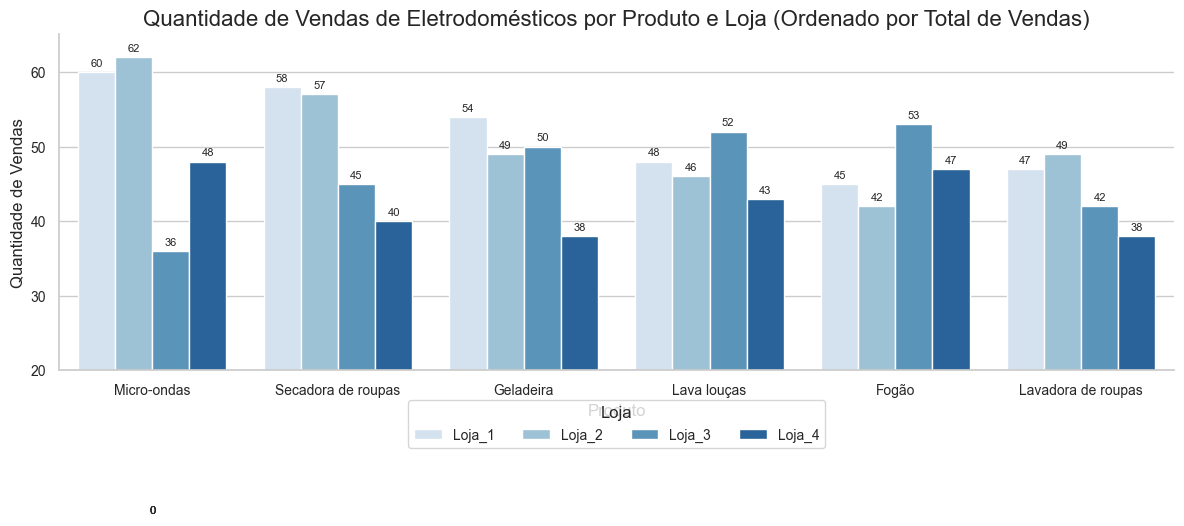

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Define o caminho base para os arquivos
caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Lista para armazenar os DataFrames de cada loja
lista_tabelas = []

# Loop para ler cada arquivo e adicionar a tabela à lista
for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

# Concatena todas as tabelas em uma única tabela chamada 'lojas'
lojas = pd.concat(lista_tabelas, ignore_index=True)

# Filtrar os dados para a categoria 'eletrodomesticos'
eletrodomesticos = lojas[lojas['Categoria do Produto'] == 'eletrodomesticos']

# Agrupar por nome do produto e loja e contar as vendas
vendas_eletro = eletrodomesticos.groupby(['Produto', 'Loja']).size().unstack(fill_value=0)

# Calcular o total de vendas por produto em todas as lojas
total_vendas_por_produto = vendas_eletro.sum(axis=1).sort_values(ascending=False)

# Obter a ordem dos produtos com base no total de vendas
ordem_produtos = total_vendas_por_produto.index

# Preparar os dados para Seaborn usando melt, mantendo a ordem dos produtos
df_melted = pd.melt(vendas_eletro.reset_index(),
                     id_vars='Produto',
                     value_vars=vendas_eletro.columns,
                     var_name='Loja',
                     value_name='Quantidade de Vendas')

# Configurar o estilo do Seaborn
sns.set_theme(style="whitegrid")

# Configurar o tamanho da figura
plt.figure(figsize=(12, 7))

# Criar o gráfico de barras agrupadas com Seaborn, especificando a ordem do eixo x
ax = sns.barplot(x='Produto', y='Quantidade de Vendas', hue='Loja', data=df_melted, palette='Blues', order=ordem_produtos)

# Adicionar a quantidade vendida no topo de cada barra
for p in ax.patches:
    altura = p.get_height()
    x_pos = p.get_x() + p.get_width() / 2.
    y_pos = altura + 0.5  # Adiciona um pequeno espaço acima da barra
    ax.text(x_pos, y_pos, f'{int(altura)}', ha='center', va='bottom', fontsize=8)

# Adicionar rótulos e título
plt.xlabel("Produto", fontsize=12)
plt.ylabel("Quantidade de Vendas", fontsize=12)
plt.title("Quantidade de Vendas de Eletrodomésticos por Produto e Loja (Ordenado por Total de Vendas)", fontsize=16)
plt.xticks(rotation=360, ha='center', fontsize=10)
plt.yticks(fontsize=10)

# Adicionar legenda na parte inferior central
plt.legend(title='Loja', fontsize=10, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(vendas_eletro.columns))

# Definir o limite inferior do eixo Y
plt.ylim(bottom=20)

# Remover spines desnecessárias
sns.despine()

# Ajustar o layout para evitar cortes
plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Ajustar o espaço inferior para a legenda

# Exibir o gráfico
plt.show()

### 2.12 - Vendas por Categoria - Gráfico do volume de produtos vendidos da categoria eletrodomésticos por loja

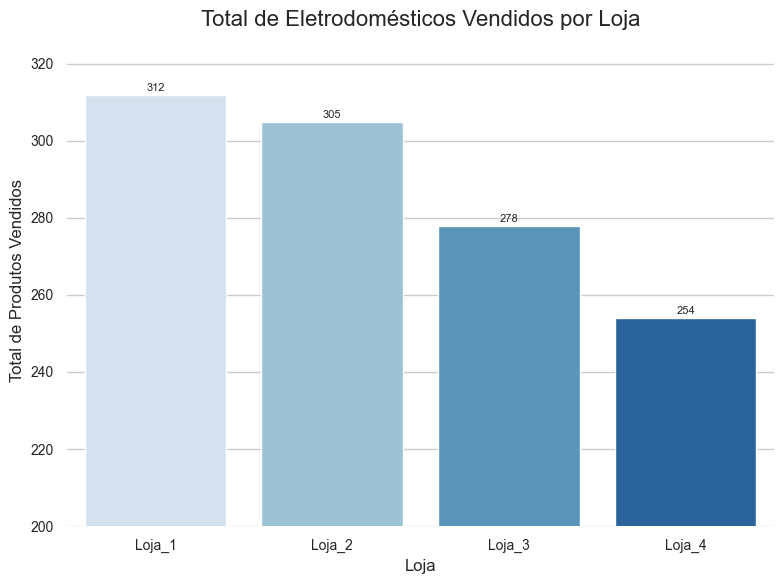

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define o caminho base para os arquivos
caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Lista para armazenar os DataFrames de cada loja
lista_tabelas = []

# Loop para ler cada arquivo e adicionar a tabela à lista
for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

# Concatena todas as tabelas em uma única tabela chamada 'lojas'
lojas = pd.concat(lista_tabelas, ignore_index=True)

# Filtrar os dados para a categoria 'eletrodomesticos'
eletrodomesticos = lojas[lojas['Categoria do Produto'] == 'eletrodomesticos']

# Agrupar por loja e contar o total de produtos vendidos por loja
total_vendas_por_loja = eletrodomesticos.groupby('Loja').size().reset_index(name='Total de Vendas')

# Configurar o estilo do Seaborn
sns.set_theme(style="whitegrid")

# Configurar o tamanho da figura
plt.figure(figsize=(8, 6))

# Criar o gráfico de barras (CORREÇÃO DO AVISO)
ax = sns.barplot(x='Loja', y='Total de Vendas', data=total_vendas_por_loja, palette='Blues', hue='Loja', legend=False)

# Adicionar a quantidade vendida no topo de cada barra
for p in ax.patches:
    altura = p.get_height()
    x_pos = p.get_x() + p.get_width() / 2.
    y_pos = altura + 0.5  # Adiciona um pequeno espaço acima da barra
    ax.text(x_pos, y_pos, f'{int(altura)}', ha='center', va='bottom', fontsize=8)

# Adicionar rótulos e título
plt.xlabel("Loja", fontsize=12)
plt.ylabel("Total de Produtos Vendidos", fontsize=12)
plt.title("Total de Eletrodomésticos Vendidos por Loja", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Definir o limite inferior do eixo Y
plt.ylim(bottom=200)

# Remover spines desnecessárias
sns.despine(bottom=True, left=True)

# Ajustar o layout para evitar cortes
plt.tight_layout()

# Exibir o gráfico
plt.show()

### 2.13 - Vendas por categoria - Gráfico do volume de vendas de produtos da categoria eletrodomésticos por tipo de produto

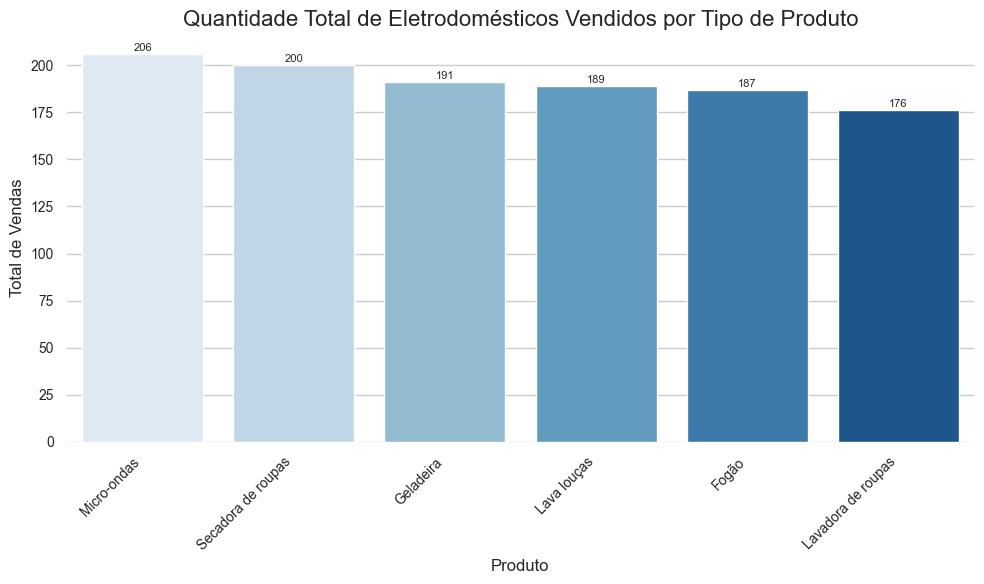

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define o caminho base para os arquivos
caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Lista para armazenar os DataFrames de cada loja
lista_tabelas = []

# Loop para ler cada arquivo e adicionar a tabela à lista
for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

# Concatena todas as tabelas em uma única tabela chamada 'lojas'
lojas = pd.concat(lista_tabelas, ignore_index=True)

# Filtrar os dados para a categoria 'eletrodomesticos'
eletrodomesticos = lojas[lojas['Categoria do Produto'] == 'eletrodomesticos']

# Agrupar por nome do produto e contar o total de vendas por produto
total_vendas_por_produto = eletrodomesticos.groupby('Produto').size().reset_index(name='Total de Vendas')

# Ordenar para visualizar do mais vendido ao menos vendido
total_vendas_por_produto_ordenado = total_vendas_por_produto.sort_values(by='Total de Vendas', ascending=False)

# Configurar o estilo do Seaborn
sns.set_theme(style="whitegrid")

# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Criar o gráfico de barras
ax = sns.barplot(x='Produto', y='Total de Vendas', data=total_vendas_por_produto_ordenado, palette='Blues', hue='Produto', legend=False)

# Adicionar a quantidade vendida no topo de cada barra
for p in ax.patches:
    altura = p.get_height()
    x_pos = p.get_x() + p.get_width() / 2.
    y_pos = altura + 0.5  # Adiciona um pequeno espaço acima da barra
    ax.text(x_pos, y_pos, f'{int(altura)}', ha='center', va='bottom', fontsize=8)

# Adicionar rótulos e título
plt.xlabel("Produto", fontsize=12)
plt.ylabel("Total de Vendas", fontsize=12)
plt.title("Quantidade Total de Eletrodomésticos Vendidos por Tipo de Produto", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Remover spines desnecessárias
sns.despine(bottom=True, left=True)

# Ajustar o layout para evitar cortes
plt.tight_layout()

# Exibir o gráfico
plt.show()

### 2.14 - Vendas por categoria - Gráfico do volume de vendas por loja e por tipo de produto da categoria eletrodomésticos

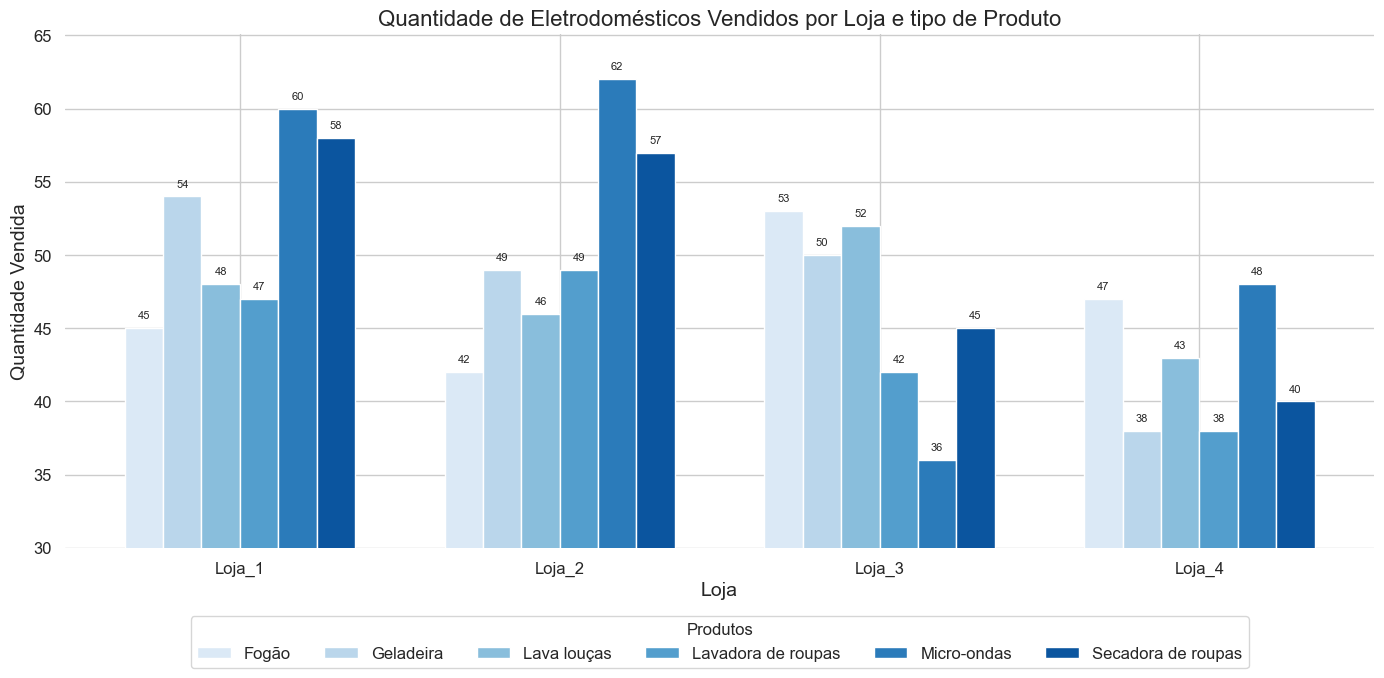

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import numpy as np
warnings.filterwarnings("ignore", message="set_ticklabels()")

# Define o caminho base para os arquivos
caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Lista para armazenar os DataFrames de cada loja
lista_tabelas = []

# Loop para ler cada arquivo e adicionar a tabela à lista
for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

# Concatena todas as tabelas em uma única tabela chamada 'lojas'
lojas = pd.concat(lista_tabelas, ignore_index=True)

# Filtrar os dados para a categoria 'eletrodomesticos'
eletrodomesticos = lojas[lojas['Categoria do Produto'] == 'eletrodomesticos']

# Calcular as vendas por produto para cada loja
vendas_por_produto_loja = eletrodomesticos.groupby(['Loja', 'Produto']).size().unstack(fill_value=0)

# Configurar o estilo do Seaborn para uma estética agradável
sns.set_theme(style="whitegrid")

# Configurar o tamanho da figura
fig, ax = plt.subplots(figsize=(14, 8))

# Adicionar mais linhas horizontais no fundo (com zorder menor)
yticks = ax.get_yticks()
for y in yticks:
    ax.axhline(y, linewidth=0.5, color='lightgray', linestyle='--', zorder=0)

# Gráfico de barras agrupadas por loja
bar_width = 0.12
posicoes_lojas = np.arange(len(vendas_por_produto_loja.index))
cores_produtos = sns.color_palette("Blues", n_colors=len(vendas_por_produto_loja.columns))

all_bars = []
for i, produto in enumerate(vendas_por_produto_loja.columns):
    bars = ax.bar(posicoes_lojas + i * bar_width, vendas_por_produto_loja[produto], bar_width, label=produto, color=cores_produtos[i], zorder=2)
    all_bars.extend(bars)
    # Adicionar a quantidade vendida no topo de cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 1), ha='center', va='bottom', fontsize=8, zorder=3)

# Garantir que as barras fiquem na frente das linhas de grade
for bar in all_bars:
    bar.set_zorder(2)

# Adicionar rótulos e título
ax.set_xlabel("Loja", fontsize=14)
ax.set_ylabel("Quantidade Vendida", fontsize=14)
ax.set_title("Quantidade de Eletrodomésticos Vendidos por Loja e tipo de Produto", fontsize=16)
ax.set_xticks(posicoes_lojas + bar_width * (len(vendas_por_produto_loja.columns) - 1) / 2)
ax.set_xticklabels(vendas_por_produto_loja.index, fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Definir o limite inferior do eixo Y
ax.set_ylim(bottom=30)

# Adicionar legenda na parte inferior central
ax.legend(title='Produtos', fontsize=12, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(vendas_por_produto_loja.columns))

# Remover spines desnecessárias
sns.despine(bottom=True, left=True)

# Ajustar o layout para evitar cortes
plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Ajustar o espaço inferior para a legenda

# Exibir o gráfico
plt.show()

# 3. Avaliações de compra

### 3.1 - Avaliações de compra - Soma das avaliações de compra por loja

In [32]:
import pandas as pd
import os

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

lista_tabelas = []

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

lojas = pd.concat(lista_tabelas, ignore_index=True)['Loja'].unique().tolist()

# Calcula a soma das avaliações de compra para cada loja
soma_avaliacoes = []
for df in lista_tabelas:
    soma = df['Avaliação da compra'].sum()
    soma_avaliacoes.append(soma)

# Cria um dicionário com os dados do resumo
dados_resumo_avaliacao = {
    'Loja': lojas,
    'Soma das Avaliações de Compra': soma_avaliacoes
}

# Cria um DataFrame a partir do dicionário
df_resumo_avaliacao = pd.DataFrame(dados_resumo_avaliacao)

# Imprime o DataFrame com a soma das avaliações por loja
print("\nSoma das Avaliações de Compra por Loja:")
print(df_resumo_avaliacao)


Soma das Avaliações de Compra por Loja:
     Loja  Soma das Avaliações de Compra
0  Loja_1                           9381
1  Loja_2                           9524
2  Loja_3                           9550
3  Loja_4                           9422


#### 3.2 - Avaliações de compra - Média geral de avaliações de compra por loja

In [33]:
import pandas as pd
import os

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

lista_tabelas = []

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

lojas = pd.concat(lista_tabelas, ignore_index=True)['Loja'].unique().tolist()

# Calcula a avaliação média por loja
avaliacao_media = [df['Avaliação da compra'].mean().round(2) for df in lista_tabelas]

# Cria o dicionário com os dados do resumo
dados_resumo_avaliacao_media = {
    'Loja': lojas,
    'Avaliação Média da Compra': avaliacao_media
}

# Cria o DataFrame a partir do dicionário
df_resumo_avaliacao_media = pd.DataFrame(dados_resumo_avaliacao_media)

# Imprime o DataFrame de resumo da avaliação média
print("\nAvaliação Média da Compra por Loja:")
print(df_resumo_avaliacao_media)


Avaliação Média da Compra por Loja:
     Loja  Avaliação Média da Compra
0  Loja_1                       3.98
1  Loja_2                       4.04
2  Loja_3                       4.05
3  Loja_4                       4.00


### 3.3 - Avaliações de compra - Gráfico da média de avaliações de compra por loja

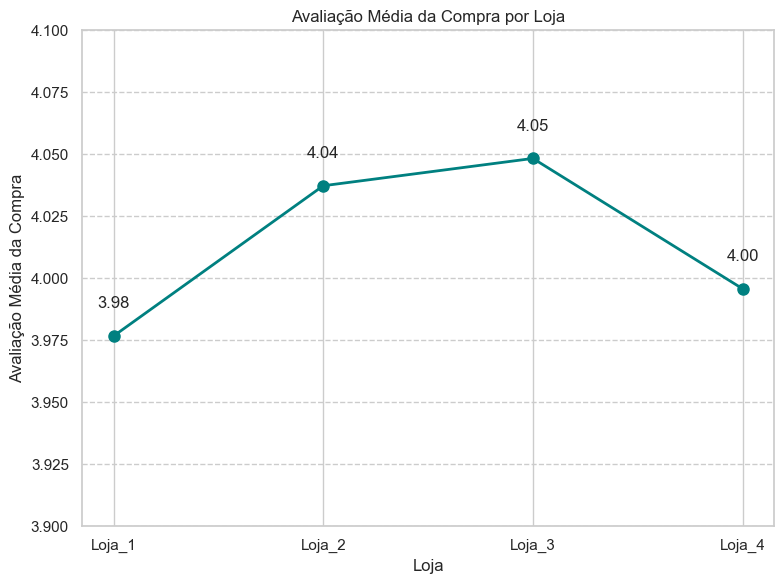

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import numpy as np

# Define o caminho base para os arquivos
caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Lista para armazenar os DataFrames de cada loja
lista_tabelas = []

# Loop para ler cada arquivo e adicionar a tabela à lista
for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

# Concatena todas as tabelas em uma única tabela chamada 'lojas'
lojas_df = pd.concat(lista_tabelas, ignore_index=True)

# Calcula a avaliação média por loja
avaliacao_media_por_loja = lojas_df.groupby('Loja')['Avaliação da compra'].mean().sort_index()

# Extrai os nomes das lojas e a avaliação média para o gráfico
nomes_lojas = avaliacao_media_por_loja.index.tolist()
avaliacao_media = avaliacao_media_por_loja.values.tolist()

# Cria o gráfico de linhas com marcadores
plt.figure(figsize=(8, 6))
plt.plot(nomes_lojas, avaliacao_media, marker='o', linestyle='-', color='teal', linewidth=2, markersize=8)

# Adiciona rótulos e título
plt.xlabel('Loja')
plt.ylabel('Avaliação Média da Compra')
plt.title('Avaliação Média da Compra por Loja')
plt.ylim(3.9, 4.1) # Define o mesmo limite no eixo y para comparação

# Adiciona os valores em cada ponto
for i, v in enumerate(avaliacao_media):
    plt.text(nomes_lojas[i], v + 0.01, f'{v:.2f}', ha='center', va='bottom')

# Adiciona uma grade para facilitar a leitura
plt.grid(axis='y', linestyle='--')

# Ajusta o layout
plt.tight_layout()

# Exibe o gráfico
plt.show()

#### 3.4 - Avaliações de compra - Soma das avaliações de compra por nota e por loja

In [37]:
import pandas as pd
import os

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

lista_tabelas = []

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

lojas = pd.concat(lista_tabelas, ignore_index=True)['Loja'].unique().tolist()

# Inicializa um dicionário para armazenar os resultados detalhados
contagem_avaliacao_por_nota_loja = {}

# Calcula a contagem de cada nota de avaliação por loja
for i, df in enumerate(lista_tabelas):
    nome_loja = nomes_lojas[i]
    # Agrupa por 'Avaliação da compra' e conta o número de ocorrências de cada nota
    contagem_por_nota = df.groupby('Avaliação da compra')['Avaliação da compra'].count()
    contagem_avaliacao_por_nota_loja[nome_loja] = contagem_por_nota

# Cria um DataFrame a partir do dicionário de resultados
df_resumo_contagem_nota_loja = pd.DataFrame(contagem_avaliacao_por_nota_loja)

# Reorganiza o DataFrame para ter as notas como índice (garantindo que todas as notas de 1 a 5 estejam presentes)
df_resumo_contagem_nota_loja = df_resumo_contagem_nota_loja.reindex(range(1, 6), fill_value=0)
df_resumo_contagem_nota_loja.index.name = 'Nota da Avaliação'

# Adiciona a coluna de Total (soma das contagens de cada nota por loja)
df_resumo_contagem_nota_loja['Total'] = df_resumo_contagem_nota_loja.sum(axis=1)

# Adiciona a linha de Total (soma das contagens de cada loja por nota)
total_linha = df_resumo_contagem_nota_loja.sum(axis=0)
total_linha.name = 'Total'
df_resumo_contagem_nota_loja = pd.concat([df_resumo_contagem_nota_loja, pd.DataFrame(total_linha).T])

# Imprime o DataFrame de resumo da contagem de avaliações por nota e loja com totais
print("\nContagem de Avaliações da Compra por Nota e Loja:")
print(df_resumo_contagem_nota_loja)


Contagem de Avaliações da Compra por Nota e Loja:
       Loja_1  Loja_2  Loja_3  Loja_4  Total
1         319     273     297     310   1199
2          86      93      79      85    343
3         218     209     193     210    830
4         444     482     434     453   1813
5        1292    1302    1356    1300   5250
Total    2359    2359    2359    2358   9435


#### 3.5 - Avaliações de compra - Média ponderada das avaliações de compra por loja e por peso de nota

##### O que é a média ponderada? 

imagine que você tem uma cesta de frutas. Algumas frutas são mais pesadas que outras, certo? Se você quiser saber o "peso médio" das frutas na cesta, não basta somar o peso de todas e dividir pela quantidade de frutas. Uma melancia pesada vai influenciar mais na média do que uma maçã leve.

A média ponderada é como calcular esse peso médio levando em conta o "peso" de cada fruta. No nosso caso das lojas, as notas mais altas (como 5) são como as frutas mais pesadas, elas "puxam" mais a média para cima. Já as notas mais baixas (como 1) são as frutas mais leves.

Ao calcular a média ponderada, a gente faz uma continha que leva em consideração quantas vezes cada nota apareceu e o "valor" dessa nota, para ter uma ideia melhor da avaliação geral de cada loja, como se estivéssemos pesando as opiniões dos clientes de acordo com a nota que eles deram.

In [38]:
import pandas as pd
import os

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

lista_tabelas = []
quantidade_produtos_por_loja = {}

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)
    # Calcula a quantidade de produtos por loja a partir do DataFrame
    quantidade_produtos_por_loja[nome_loja] = len(df_loja)

lojas_df = pd.concat(lista_tabelas, ignore_index=True)
nomes_lojas = lojas_df['Loja'].unique().tolist()
lista_dataframes = [lojas_df[lojas_df['Loja'] == loja] for loja in nomes_lojas]

# Inicializa um dicionário para armazenar as contagens por nota e loja
contagem_avaliacao_por_nota_loja = {}

# Calcula a contagem de cada nota de avaliação por loja
for i, df in enumerate(lista_dataframes):
    nome_loja = nomes_lojas[i]
    # Agrupa por 'Avaliação da compra' e conta o número de ocorrências de cada nota
    contagem_por_nota = df.groupby('Avaliação da compra')['Avaliação da compra'].count()
    contagem_avaliacao_por_nota_loja[nome_loja] = contagem_por_nota

# Cria um DataFrame a partir do dicionário de contagens
df_contagem_avaliacao_nota_loja = pd.DataFrame(contagem_avaliacao_por_nota_loja)

# Reorganiza o DataFrame para ter as notas como índice
df_contagem_avaliacao_nota_loja = df_contagem_avaliacao_nota_loja.reindex(range(1, 6), fill_value=0)
df_contagem_avaliacao_nota_loja.index.name = "Nota da Avaliação"

# Calcula a média ponderada para cada nota em cada loja
df_media_ponderada_nota_loja = df_contagem_avaliacao_nota_loja.copy()

for loja in df_media_ponderada_nota_loja.columns:
    if loja in quantidade_produtos_por_loja:
        df_media_ponderada_nota_loja[loja] = (df_contagem_avaliacao_nota_loja[loja] * df_contagem_avaliacao_nota_loja.index) / quantidade_produtos_por_loja[loja]
    else:
        print(f"Aviso: Quantidade de produtos para a loja {loja} não encontrada.")
        df_media_ponderada_nota_loja[loja] = 0   # Atribui 0 se a loja não for encontrada

df_media_ponderada_nota_loja = df_media_ponderada_nota_loja.round(4)

# Calcula a soma das médias ponderadas de cada loja
df_media_ponderada_nota_loja['Total'] = df_media_ponderada_nota_loja[['Loja_1', 'Loja_2', 'Loja_3', 'Loja_4']].sum(axis=1).round(4)

# Reordena as colunas para colocar 'Total' após 'Loja_4'
colunas = list(df_media_ponderada_nota_loja.columns)
colunas_reordenadas = colunas[:-1] + [colunas[-1]]
df_media_ponderada_nota_loja = df_media_ponderada_nota_loja[colunas_reordenadas]

# Adiciona linha de Total (média ponderada geral da loja)
total_media_ponderada_por_loja = df_media_ponderada_nota_loja.sum(axis=0).round(4)
total_media_ponderada_por_loja.name = "Total"
df_media_ponderada_nota_loja = pd.concat([df_media_ponderada_nota_loja, pd.DataFrame(total_media_ponderada_por_loja).T])

# Imprime o DataFrame de resumo da média ponderada por nota e loja com o total
print("\nMédia Ponderada da Avaliação por Nota e Loja com Total:")
print(df_media_ponderada_nota_loja)


Média Ponderada da Avaliação por Nota e Loja com Total:
       Loja_1  Loja_2  Loja_3  Loja_4    Total
1      0.1352  0.1157  0.1259  0.1315   0.5083
2      0.0729  0.0788  0.0670  0.0721   0.2908
3      0.2772  0.2658  0.2454  0.2672   1.0556
4      0.7529  0.8173  0.7359  0.7684   3.0745
5      2.7384  2.7596  2.8741  2.7566  11.1287
Total  3.9766  4.0372  4.0483  3.9958  16.0579


### 3.6 - Avaliações de compra - Gráfico da média ponderada das avaliações de compra por nota e por loja

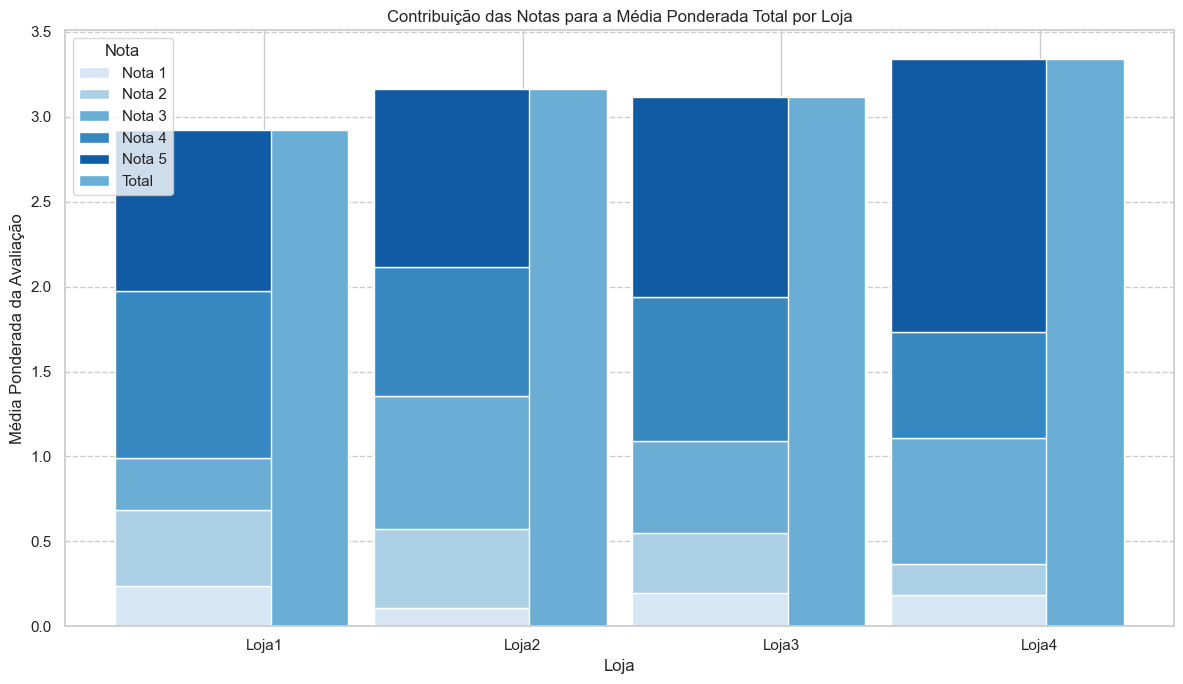

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Definindo o número correto de lojas e notas
num_lojas = 4
notas = [1, 2, 3, 4, 5]
lojas = [f'Loja{i+1}' for i in range(num_lojas)]

# Simulação de dados de avaliação (número de avaliações por nota em cada loja)
np.random.seed(42)  # Para reproducibilidade
num_avaliacoes = np.random.randint(50, 200, size=(num_lojas, len(notas)))

# Cálculo da média ponderada para cada nota em cada loja
dados_notas = {f'Nota {nota}': [] for nota in notas}
total_ponderado = []

for i in range(num_lojas):
    total_avaliacoes_loja = np.sum(num_avaliacoes[i])
    ponderado_loja = 0
    for j, nota in enumerate(notas):
        media_ponderada_nota = (num_avaliacoes[i, j] * nota) / total_avaliacoes_loja if total_avaliacoes_loja > 0 else 0
        dados_notas[f'Nota {nota}'].append(media_ponderada_nota)
        ponderado_loja += media_ponderada_nota
    total_ponderado.append(ponderado_loja)

df_notas = pd.DataFrame(dados_notas, index=lojas)
df_total = pd.DataFrame({'Total': total_ponderado}, index=lojas)

# Define a paleta de cores 'Greens' do Seaborn
cores = sns.color_palette('Blues', n_colors=len(notas))

# Escolhe o verde mais escuro da paleta para o total
cor_total = cores[-3]

# Cria a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 7))

# Plota as barras empilhadas para cada loja
bottom = np.zeros(len(lojas))
for i, nota in enumerate(df_notas.columns):
    ax.bar(df_notas.index, df_notas[nota], bottom=bottom, color=cores[i], label=nota)
    bottom += df_notas[nota]

# Plota as barras separadas para o total, usando o verde mais escuro
x_total = np.arange(len(lojas)) + 0.35  # Desloca um pouco para a direita
ax.bar(x_total, df_total['Total'], width=0.3, color=cor_total, label='Total')

# Adiciona rótulos e título
ax.set_xlabel('Loja')
ax.set_ylabel('Média Ponderada da Avaliação')
ax.set_title('Contribuição das Notas para a Média Ponderada Total por Loja')
ax.set_xticks(np.arange(len(lojas)) + 0.175) # Centraliza os rótulos das lojas
ax.set_xticklabels(lojas)
ax.legend(title='Nota')
ax.grid(axis='y', linestyle='--')

# Ajusta o layout
plt.tight_layout()

# Exibe o gráfico
plt.show()

# 4. Produtos Mais e Menos Vendidos

### 4.1 - Produtos Mais e Menos Vendidos - Volume de vendas dos 5 produtos mais e menos vendidos pelas lojas

In [40]:
import pandas as pd
import os

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Lista para armazenar os Dataframes de cada loja
lista_tabelas = []

# Loop para ler cada arquivo e adicionar a tabela à lista
for arquivo in arquivos_lojas:
    caminho_completo = caminho_base + arquivo
    df_loja = pd.read_csv(caminho_completo)
    lista_tabelas.append(df_loja)

# Concatena todas as tabelas em uma única tabela chamada 'lojas'
lojas = pd.concat(lista_tabelas, ignore_index=True)

# Contagem de vendas por produto
contagem_vendas_produto = lojas['Produto'].value_counts().reset_index()
contagem_vendas_produto.columns = ['Produto', 'Quantidade de Vendas']

# 5 produtos mais vendidos
mais_vendidos = contagem_vendas_produto.head(5)

# 5 produtos menos vendidos
menos_vendidos = contagem_vendas_produto.tail(5)

# Tabela com os 5 produtos mais vendidos
print("\n5 Produtos Mais Vendidos:\n")
print(mais_vendidos)

# Tabela com os 5 produtos menos vendidos
print("\n5 Produtos Menos Vendidos:\n")
print(menos_vendidos)


5 Produtos Mais Vendidos:

                    Produto  Quantidade de Vendas
0                    Cômoda                   210
1  Carrinho controle remoto                   206
2               Micro-ondas                   206
3                   Bateria                   203
4                 Cama king                   201

5 Produtos Menos Vendidos:

                        Produto  Quantidade de Vendas
46  Ciência de dados com python                   166
47                     Guitarra                   165
48                      Mochila                   163
49                      Headset                   158
50                 Celular ABXY                   157


### 4.2 - Produtos mais e menos vendidos - Gráfico dos 5 produtos mais e menos vendidos pelas lojas

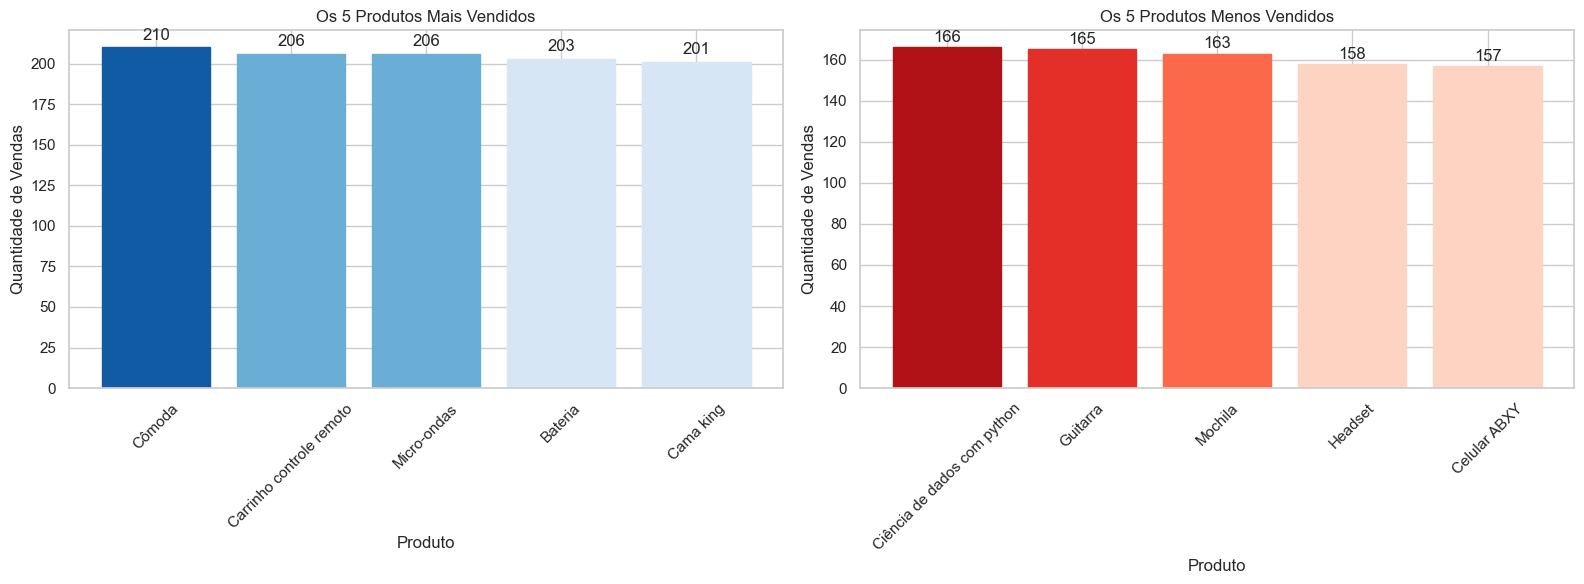

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# Define o caminho base para os arquivos
caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Lista para armazenar os DataFrames de cada loja
lista_tabelas = []

# Loop para ler cada arquivo e adicionar a tabela à lista
for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

# Concatena todas as tabelas em uma única tabela chamada 'lojas'
lojas_df = pd.concat(lista_tabelas, ignore_index=True)

# Calcula a quantidade total de vendas por produto
vendas_por_produto = lojas_df['Produto'].value_counts()

# Obtém os 5 produtos mais vendidos e suas quantidades (ordenando pelo valor)
mais_vendidos = vendas_por_produto.head(5).sort_values(ascending=False)
mais_vendidos_produtos = mais_vendidos.index
mais_vendidos_quantidades = mais_vendidos.values

# Obtém os 5 produtos menos vendidos e suas quantidades (ordenando pelo valor)
menos_vendidos = vendas_por_produto.tail(5).sort_values(ascending=False)
menos_vendidos_produtos = menos_vendidos.index
menos_vendidos_quantidades = menos_vendidos.values

# Cria a figura com dois subplots (1 linha, 2 colunas)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define as paletas de cores seaborn com 5 tons
paleta_mais_vendidos = sns.color_palette("Blues", n_colors=5)
paleta_menos_vendidos = sns.color_palette("Reds", n_colors=5)

# Gráfico dos mais vendidos no primeiro subplot
bars_mais_vendidos = axes[0].bar(mais_vendidos_produtos, mais_vendidos_quantidades)
axes[0].set_xlabel('Produto')
axes[0].set_ylabel('Quantidade de Vendas')
axes[0].set_title('Os 5 Produtos Mais Vendidos')
axes[0].tick_params(axis='x', rotation=45, labelbottom=True)
for i, v in enumerate(mais_vendidos_quantidades):
    axes[0].text(i, v + 3, str(v), ha='center', va='bottom')

# Atribui cores às barras dos mais vendidos com base na quantidade
norm_mais_vendidos = plt.Normalize(min(mais_vendidos_quantidades), max(mais_vendidos_quantidades))
for bar, quantidade in zip(bars_mais_vendidos, mais_vendidos_quantidades):
    cor = paleta_mais_vendidos[int(norm_mais_vendidos(quantidade) * (len(paleta_mais_vendidos) - 1))]
    bar.set_color(cor)

# Gráfico dos menos vendidos no segundo subplot
bars_menos_vendidos = axes[1].bar(menos_vendidos_produtos, menos_vendidos_quantidades)
axes[1].set_xlabel('Produto')
axes[1].set_ylabel('Quantidade de Vendas')
axes[1].set_title('Os 5 Produtos Menos Vendidos')
axes[1].tick_params(axis='x', rotation=45, labelbottom=True)
for i, v in enumerate(menos_vendidos_quantidades):
    axes[1].text(i, v + 1, str(v), ha='center', va='bottom') # Esta linha estava faltando

# Atribui cores às barras dos menos vendidos com base na quantidade
norm_menos_vendidos = plt.Normalize(min(menos_vendidos_quantidades), max(menos_vendidos_quantidades))
for bar, quantidade in zip(bars_menos_vendidos, menos_vendidos_quantidades):
    cor = paleta_menos_vendidos[int(norm_menos_vendidos(quantidade) * (len(paleta_menos_vendidos) - 1))]
    bar.set_color(cor)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe a figura com os subplots
plt.show()

### 4.3 - Produtos mais e menos vendidos - Volume de vendas dos 5 produtos mais e menos vendidos por loja

In [53]:
import pandas as pd
import os

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Lista para armazenar os Dataframes de cada loja
lista_tabelas = []

# Loop para ler cada arquivo e adicionar a tabela à lista
for arquivo in arquivos_lojas:
    caminho_completo = caminho_base + arquivo
    df_loja = pd.read_csv(caminho_completo)
    lista_tabelas.append(df_loja)

# Concatena todas as tabelas em uma única tabela chamada 'lojas'
lojas = pd.concat(lista_tabelas, ignore_index=True)

# Lê os arquivos CSV e armazena os DataFrames em uma lista
def top_bottom_n(df, n=5):
    top_n = df.nlargest(n, 'Quantidade de Vendas')
    bottom_n = df.nsmallest(n, 'Quantidade de Vendas')
    return top_n, bottom_n

# Loop para calcular e exibir os 5 produtos mais e menos vendidos para cada loja
for arquivo in arquivos_lojas:
    caminho_completo = caminho_base + arquivo
    df_loja = pd.read_csv(caminho_completo)
    df_loja['Loja'] = arquivo.split('.')[0].replace('_', ' ').title()

    # Contagem de vendas
    contagem_vendas = df_loja.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade de Vendas')

    print(f"\nLoja: {df_loja['Loja'].iloc[0]}")

    # Encontrar top 5 e bottom 5 para a loja atual
    top_5, bottom_5 = top_bottom_n(contagem_vendas.loc[contagem_vendas['Loja'] == df_loja['Loja'].iloc[0]], 5)

    print("\nTop 5:\n", top_5.to_string(index=False))
    print("\nBottom 5:\n", bottom_5.to_string(index=False))


Loja: Loja 1

Top 5:
   Loja            Produto  Quantidade de Vendas
Loja 1      Guarda roupas                    60
Loja 1        Micro-ondas                    60
Loja 1      TV Led UHD 4K                    60
Loja 1 Secadora de roupas                    58
Loja 1   Blocos de montar                    56

Bottom 5:
   Loja                     Produto  Quantidade de Vendas
Loja 1                Celular ABXY                    33
Loja 1                     Headset                    33
Loja 1           Panela de pressão                    35
Loja 1                    Pandeiro                    36
Loja 1 Ciência de dados com python                    39

Loja: Loja 2

Top 5:
   Loja                  Produto  Quantidade de Vendas
Loja 2 Iniciando em programação                    65
Loja 2              Micro-ondas                    62
Loja 2                  Bateria                    61
Loja 2                 Pandeiro                    58
Loja 2                   Violão           

### 4.4 - Produtos mais e menos vendidos - Gráfico do volume de vendas dos 5 produtos mais e menos vendidos por loja

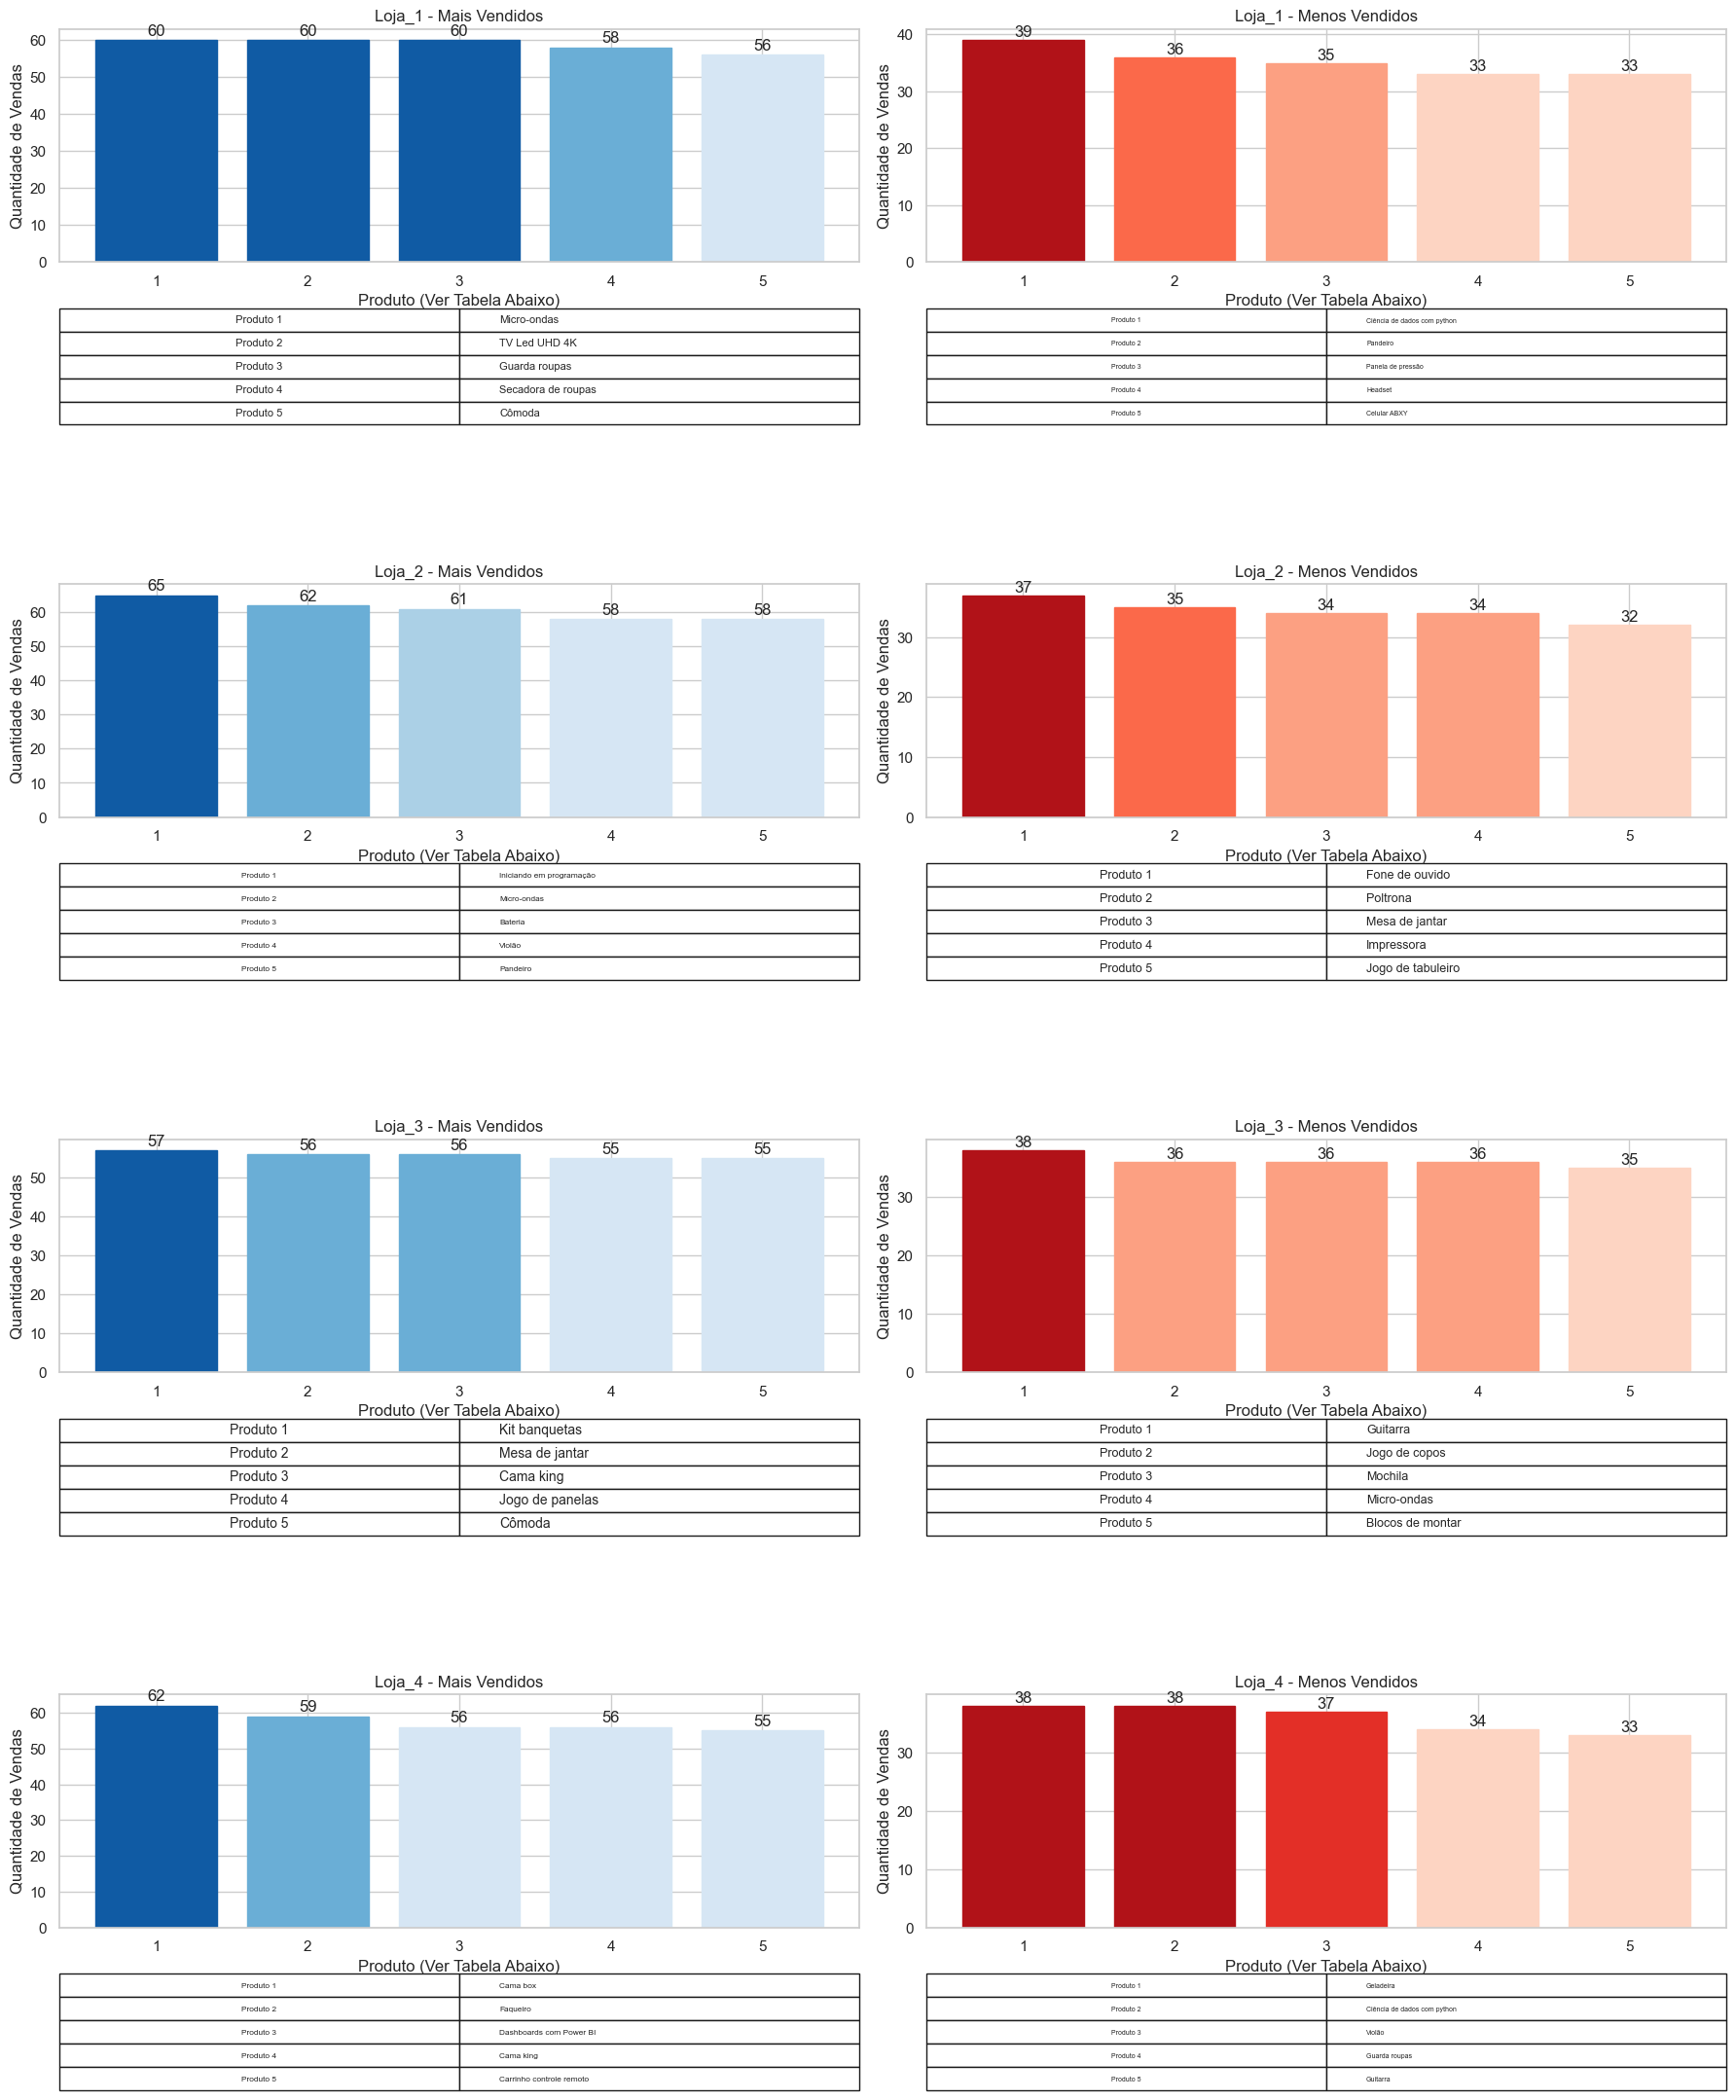

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib.table import Table

# Define o caminho base para os arquivos
caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Dicionário para armazenar os dados de cada loja
dados_lojas = {}

# Loop para ler cada arquivo, processar os dados e armazená-los em dados_lojas
for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja

    # Calcula a quantidade total de vendas por produto na loja atual
    vendas_por_produto = df_loja['Produto'].value_counts().sort_values(ascending=False)

    # Obtém os 5 produtos mais vendidos e suas quantidades
    top_5_vendas = vendas_por_produto.head(5)
    top_5_produtos = top_5_vendas.index.tolist()
    top_5_quantidades = top_5_vendas.values.tolist()

    # Obtém os 5 produtos menos vendidos e suas quantidades
    bottom_5_vendas = vendas_por_produto.tail(5)
    bottom_5_produtos = bottom_5_vendas.index.tolist()
    bottom_5_quantidades = bottom_5_vendas.values.tolist()

    # Armazena os dados no dicionário dados_lojas
    dados_lojas[nome_loja] = {
        'Top 5 Produtos': top_5_produtos,
        'Top 5 Vendas': top_5_quantidades,
        'Bottom 5 Produtos': bottom_5_produtos,
        'Bottom 5 Vendas': bottom_5_quantidades
    }

# Cria a figura com os subplots (4 lojas x 2 categorias)
fig, axes = plt.subplots(4, 2, figsize=(18, 25), gridspec_kw={'height_ratios': [3, 3, 3, 3]})

# Itera sobre as lojas e cria os gráficos para mais e menos vendidos
for i, (loja, dados) in enumerate(dados_lojas.items()):
    # Subplot para os 5 produtos mais vendidos
    ax_top = axes[i, 0]
    num_top_produtos = len(dados['Top 5 Vendas'])
    paleta_top = sns.color_palette("Blues", n_colors=num_top_produtos)
    norm_top = plt.Normalize(min(dados['Top 5 Vendas']), max(dados['Top 5 Vendas']))
    bars_top = ax_top.bar(range(1, num_top_produtos + 1), dados['Top 5 Vendas'])
    for bar, quantidade in zip(bars_top, dados['Top 5 Vendas']):
        cor = paleta_top[int(norm_top(quantidade) * (len(paleta_top) - 1))]
        bar.set_color(cor)
    ax_top.set_xlabel('Produto (Ver Tabela Abaixo)')
    ax_top.set_ylabel('Quantidade de Vendas')
    ax_top.set_title(f'{loja} - Mais Vendidos')
    ax_top.set_xticks(range(1, num_top_produtos + 1))
    for bar in bars_top:
        yval = bar.get_height()
        ax_top.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

    # Subplot para os 5 produtos menos vendidos
    ax_bottom = axes[i, 1]
    num_bottom_produtos = len(dados['Bottom 5 Vendas'])
    paleta_bottom = sns.color_palette("Reds", n_colors=num_bottom_produtos)
    norm_bottom = plt.Normalize(min(dados['Bottom 5 Vendas']), max(dados['Bottom 5 Vendas']))
    bars_bottom = ax_bottom.bar(range(1, num_bottom_produtos + 1), dados['Bottom 5 Vendas'])
    for bar, quantidade in zip(bars_bottom, dados['Bottom 5 Vendas']):
        cor = paleta_bottom[int(norm_bottom(quantidade) * (len(paleta_bottom) - 1))]
        bar.set_color(cor)
    ax_bottom.set_xlabel('Produto (Ver Tabela Abaixo)')
    ax_bottom.set_ylabel('Quantidade de Vendas')
    ax_bottom.set_title(f'{loja} - Menos Vendidos')
    ax_bottom.set_xticks(range(1, num_bottom_produtos + 1))
    for bar in bars_bottom:
        yval = bar.get_height()
        ax_bottom.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

    # Cria a tabela de legenda abaixo dos gráficos da loja atual
    table_data_top = [[n, prod] for n, prod in enumerate(dados['Top 5 Produtos'], start=1)]
    table_top = Table(ax_top, bbox=[0.0, -0.7, 1.0, 0.5])
    for cell in table_data_top:
        table_top.add_cell(cell[0]-1, 0, 1/len(table_data_top), 0.5, text=f'Produto {cell[0]}', loc='center')
        table_top.add_cell(cell[0]-1, 0.5, 1/len(table_data_top), 0.5, text=cell[1], loc='left')
    ax_top.add_table(table_top)

    table_data_bottom = [[n, prod] for n, prod in enumerate(dados['Bottom 5 Produtos'], start=1)]
    table_bottom = Table(ax_bottom, bbox=[0.0, -0.7, 1.0, 0.5])
    for cell in table_data_bottom:
        table_bottom.add_cell(cell[0]-1, 0, 1/len(table_data_bottom), 0.5, text=f'Produto {cell[0]}', loc='center')
        table_bottom.add_cell(cell[0]-1, 0.5, 1/len(table_data_bottom), 0.5, text=cell[1], loc='left')
    ax_bottom.add_table(table_bottom)

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Exibe a figura com os subplots e tabelas
plt.show()

# 5. Frete 

### 5.1 - Frete - Média do valor de frete por loja

In [57]:
import pandas as pd
import os

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Lista para armazenar os DataFrames de cada loja
lista_tabelas = []

# Loop para ler cada arquivo e adicionar a tabela à lista
for arquivo in arquivos_lojas:
    caminho_completo = caminho_base + arquivo
    df_loja = pd.read_csv(caminho_completo)
    df_loja['Loja'] = arquivo.split('.')[0].replace('_', ' ').title()  # Adiciona a coluna 'Loja'
    lista_tabelas.append(df_loja)

# Concatena todas as tabelas em uma única tabela chamada 'lojas'
lojas = pd.concat(lista_tabelas, ignore_index=True)

# Calcula a média do frete por loja
frete_medio_por_loja = lojas.groupby('Loja')['Frete'].mean().reset_index()

# Formata a coluna de Frete para moeda Real do Brasil
frete_medio_por_loja['Frete'] = frete_medio_por_loja['Frete'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', '#TEMP#').replace('.', ',').replace('#TEMP#', '.'))

# Exibe o resultado usando to_string()
print("\nFrete Médio por Loja:\n")
print(frete_medio_por_loja.to_string(index=False))


Frete Médio por Loja:

  Loja    Frete
Loja 1 R$ 34,69
Loja 2 R$ 33,62
Loja 3 R$ 33,07
Loja 4 R$ 31,28


### 5.2 - Frete - Gráfico do valor da média de frete por loja

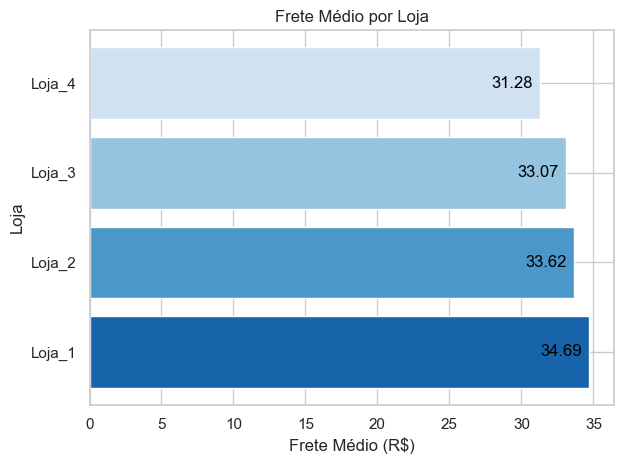

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# Define o caminho base para os arquivos
caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Lista para armazenar os DataFrames de cada loja
lista_tabelas = []

# Loop para ler cada arquivo e adicionar a tabela à lista
for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

# Concatena todas as tabelas em uma única tabela chamada 'lojas_df'
lojas_df = pd.concat(lista_tabelas, ignore_index=True)

# Correção: Use o nome correto da coluna de frete aqui
nome_coluna_frete_correto = 'Nome_da_Coluna_de_Frete' # Substitua pelo nome correto

# Calcula o frete médio por loja
frete_medio_por_loja = lojas_df.groupby('Loja')['Frete'].mean().sort_values()

# Extrai os nomes das lojas e os valores do frete médio
lojas = frete_medio_por_loja.index
frete_medio = frete_medio_por_loja.values

# Cria o gráfico de barras horizontais
plt.barh(lojas, frete_medio, color=sns.color_palette('Blues', n_colors=len(lojas)))

# Adiciona rótulos e título
plt.xlabel('Frete Médio (R$)')
plt.ylabel('Loja')
plt.title('Frete Médio por Loja')

# Adiciona os valores na porção interna das barras, alinhados à direita
for i, v in enumerate(frete_medio):
    plt.text(v - 0.5, i, f'{v:.2f}', va='center', color='black', ha='right')

# Inverte o eixo y para mostrar a Loja 1 no topo (opcional, mas pode ser intuitivo)
plt.gca().invert_yaxis()

# Ajusta o layout para evitar cortes
plt.tight_layout()

# Exibe o gráfico
plt.show()

# 6. Lucro Bruto (parcial)

### 6.1 - Lucro Bruto (parcial) - Valor do lucro bruto parcial de vendas por loja

Lucro Bruto Parcial = Faturamento - Despesa de frete

In [59]:
import pandas as pd
import os

caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Lista para armazenar os DataFrames de cada loja
lista_tabelas = []

# Loop para ler cada arquivo e adicionar a tabela à lista
for arquivo in arquivos_lojas:
    caminho_completo = caminho_base + arquivo
    df_loja = pd.read_csv(caminho_completo)
    df_loja['Loja'] = arquivo.split('.')[0].replace('_', ' ').title()  # Adiciona a coluna 'Loja'
    lista_tabelas.append(df_loja)

# Concatena todas as tabelas em uma única tabela chamada 'lojas'
lojas = pd.concat(lista_tabelas, ignore_index=True)

# Faturamento Total por loja (Faturamento Total)
faturamento_lojas = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento Total': [1534509.12, 1488459.06, 1464025.03, 1384497.58]
})

# Total de gasto com frete por loja (Frete Total)
frete_lojas = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Total': [52345.67, 48762.12, 55890.34, 42123.90]
})

# 1. Juntar as tabelas (dataframes) pela coluna 'Loja'
avaliacao_receita = pd.merge(faturamento_lojas, frete_lojas, on='Loja', how='inner')

# 2. Calcular a Receita Líquida Descontando o Frete
avaliacao_receita['Lucro Bruto Parcial'] = avaliacao_receita['Faturamento Total'] - avaliacao_receita['Frete Total']

# 3. Formatar todas as colunas como moeda (Real) com separador de milhar
def formatar_moeda_br(valor):
    return f'R$ {valor:_.2f}'.replace('.', ',').replace('_', '.')

# Formatar as colunas desejadas como moeda Real
colunas_para_formatar = ['Faturamento Total', 'Frete Total', 'Lucro Bruto Parcial']

for coluna in colunas_para_formatar:
    avaliacao_receita[coluna + ' (R$)'] = avaliacao_receita[coluna].apply(formatar_moeda_br)

# Exibir a avaliação da receita com os valores formatados
print("Avaliação do Lucro Bruto Parcial das Lojas Descontando o Frete (Valores em Real):")
print(avaliacao_receita[['Loja', 'Faturamento Total (R$)', 'Frete Total (R$)', 'Lucro Bruto Parcial (R$)']])

Avaliação do Lucro Bruto Parcial das Lojas Descontando o Frete (Valores em Real):
     Loja Faturamento Total (R$) Frete Total (R$) Lucro Bruto Parcial (R$)
0  Loja 1        R$ 1.534.509,12     R$ 52.345,67          R$ 1.482.163,45
1  Loja 2        R$ 1.488.459,06     R$ 48.762,12          R$ 1.439.696,94
2  Loja 3        R$ 1.464.025,03     R$ 55.890,34          R$ 1.408.134,69
3  Loja 4        R$ 1.384.497,58     R$ 42.123,90          R$ 1.342.373,68


### 6.2 - Lucro bruto parcial - Gráfico do lucro bruto parcial por loja

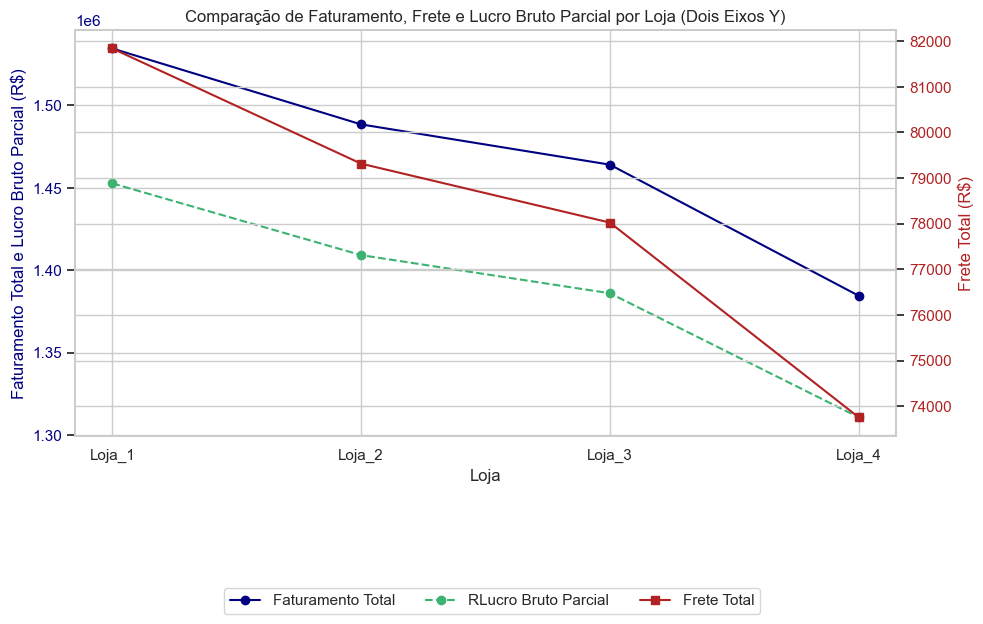

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# Define o caminho base para os arquivos
caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']

# Lista para armazenar os DataFrames de cada loja
lista_tabelas = []

# Loop para ler cada arquivo e adicionar a tabela à lista
for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

# Concatena todas as tabelas em uma única tabela chamada 'lojas_df'
lojas_df = pd.concat(lista_tabelas, ignore_index=True)

# Calcula o total de produtos vendidos em todas as lojas
lojas_df['Quantidade'] = 1

# Calcula a coluna 'Faturamento'
lojas_df['Faturamento'] = lojas_df['Quantidade'] * lojas_df['Preço']

# Calcula a coluna 'Receita Líquida'
lojas_df['Lucro Bruto Parcial'] = lojas_df['Faturamento'] - lojas_df['Frete']

# Obtém a lista única de lojas
lojas_analise = lojas_df['Loja'].unique()

# Listas para armazenar os resultados por loja
faturamento_total_por_loja = []
receita_liquida_total_por_loja = []
frete_total_por_loja = []

# Loop para calcular o total de faturamento, receita líquida e frete por loja
for loja in lojas_analise:
    loja_df = lojas_df[lojas_df['Loja'] == loja]

    if not loja_df.empty:
        # Total de Faturamento da loja
        faturamento_total = loja_df['Faturamento'].sum()

        # Total de Receita Líquida da loja (agora já calculado na linha anterior)
        receita_liquida_total = loja_df['Lucro Bruto Parcial'].sum()

        # Total de Frete da loja
        frete_total = loja_df['Frete'].sum() # Corrigido o nome da coluna

        faturamento_total_por_loja.append(faturamento_total)
        receita_liquida_total_por_loja.append(receita_liquida_total)
        frete_total_por_loja.append(frete_total)
    else:
        faturamento_total_por_loja.append(0)
        receita_liquida_total_por_loja.append(0)
        frete_total_por_loja.append(0)

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'navy'
ax1.set_xlabel('Loja')
ax1.set_ylabel('Faturamento Total e Lucro Bruto Parcial (R$)', color=color)
linha_faturamento, = ax1.plot(lojas_analise, faturamento_total_por_loja, marker='o', linestyle='-', color=color, label='Faturamento Total')
linha_receita, = ax1.plot(lojas_analise, receita_liquida_total_por_loja, marker='o', linestyle='--', color='mediumseagreen', label='Lucro Bruto Parcial')
ax1.tick_params(axis='y', labelcolor=color)
# ax1.legend(loc='upper left') # Remova a legenda daqui
ax1.grid(True)

ax2 = ax1.twinx()  # Compartilha o mesmo eixo x

color = 'firebrick'
ax2.set_ylabel('Frete Total (R$)', color=color)
linha_frete, = ax2.plot(lojas_analise, frete_total_por_loja, marker='s', linestyle='-', color=color, label='Frete Total')
ax2.tick_params(axis='y', labelcolor=color)
# ax2.legend(loc='lower right') # Remova a legenda daqui

# Agrupa as legendas e define a posição na parte inferior
fig.legend(handles=[linha_faturamento, linha_receita, linha_frete],
           labels=['Faturamento Total', 'RLucro Bruto Parcial', 'Frete Total'],
           loc='lower center',
           bbox_to_anchor=(0.5, -0.1),
           ncol=3)

plt.title('Comparação de Faturamento, Frete e Lucro Bruto Parcial por Loja (Dois Eixos Y)')
fig.tight_layout(rect=[0, 0.1, 1, 0.95]) # Ajusta o layout para acomodar a legenda
plt.show()

# 7 - Desempenho geográfico

### 7.1 - Desempenho geográfico - Volume de vendas por região - representação quantitativa e percentual

In [61]:
import pandas as pd
import os

# Define o caminho base para os arquivos
caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']
lista_tabelas = []

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

lojas_df = pd.concat(lista_tabelas, ignore_index=True)

# Mapeamento de estados para regiões
regioes_estados = {
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}

# Adicionar a coluna 'Regiao'
lojas_df['Regiao'] = lojas_df['Local da compra'].map(regioes_estados)

# Agrupar por Loja e Região e calcular o total de vendas
vendas_por_loja_regiao = lojas_df.groupby(['Loja', 'Regiao']).size().reset_index(name='Total Vendas')

# Calcular o total de vendas por Região
total_vendas_por_regiao = vendas_por_loja_regiao.groupby('Regiao')['Total Vendas'].sum().sort_values(ascending=False)

# Criar a tabela resumo por região com a linha de total
df_regiao_com_total = total_vendas_por_regiao.reset_index(name='Total Vendas')
total_geral = df_regiao_com_total['Total Vendas'].sum()
df_regiao_com_total.loc['Total'] = ['Total Geral', total_geral]

# Criar a tabela resumo por região em percentual com a linha de total
df_regiao_percentual = (total_vendas_por_regiao / total_geral * 100).reset_index(name='Percentual')
df_regiao_percentual['Percentual'] = df_regiao_percentual['Percentual'].map('{:.2f}%'.format)
df_regiao_percentual.loc['Total'] = ['Total Geral', '100.00%']

# Exibir a tabela resumo por região, com a linha de total
print("\nTabela de Quantidade de Vendas por Região:")
print(df_regiao_com_total)

# Exibir a tabela resumo por região em percentual, com a linha de total
print("\nTabela de Percentual de Vendas por Região:")
print(df_regiao_percentual)


Tabela de Quantidade de Vendas por Região:
             Regiao  Total Vendas
0           Sudeste          6428
1               Sul          1353
2          Nordeste           907
3      Centro-Oeste           590
4             Norte           157
Total   Total Geral          9435

Tabela de Percentual de Vendas por Região:
             Regiao Percentual
0           Sudeste     68.13%
1               Sul     14.34%
2          Nordeste      9.61%
3      Centro-Oeste      6.25%
4             Norte      1.66%
Total   Total Geral    100.00%


### 7.2 - Desempenho geográfico - Volume de vendas por região e por local de compra (estado)

In [62]:
import pandas as pd
import os

# Define o caminho base para os arquivos
caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']
lista_tabelas = []

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

lojas_df = pd.concat(lista_tabelas, ignore_index=True)

# Mapeamento de estados para regiões
regioes_estados = {
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}

# Adicionar a coluna 'Regiao'
lojas_df['Regiao'] = lojas_df['Local da compra'].map(regioes_estados)

# Agrupar os dados por região e estado
df_regiao = lojas_df.groupby(['Regiao', 'Local da compra']).size().reset_index(name='Total Vendas')

# Padronizar os dados do estado (IMPORTANTE)
df_regiao['Local da compra'] = df_regiao['Local da compra'].str.upper().str.strip()

# Exibir a tabela resumo
print(df_regiao)

          Regiao Local da compra  Total Vendas
0   Centro-Oeste              DF           242
1   Centro-Oeste              GO           186
2   Centro-Oeste              MS            82
3   Centro-Oeste              MT            80
4       Nordeste              AL            41
5       Nordeste              BA           310
6       Nordeste              CE           151
7       Nordeste              MA            62
8       Nordeste              PB            46
9       Nordeste              PE           181
10      Nordeste              PI            40
11      Nordeste              RN            48
12      Nordeste              SE            28
13         Norte              AC             3
14         Norte              AM            14
15         Norte              AP             9
16         Norte              PA            81
17         Norte              RO            19
18         Norte              RR             2
19         Norte              TO            29
20       Sude

### 7.3 - Desempenho geográfico - Volume de vendas quantitativo e percentual das lojas por região

In [63]:
import pandas as pd
import os

# Define o caminho base para os arquivos (ajuste se necessário)
caminho_base = "./base-de-dados-challenge-1/"
arquivos_lojas = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']
lista_tabelas = []

for arquivo in arquivos_lojas:
    caminho_completo = os.path.join(caminho_base, arquivo)
    df_loja = pd.read_csv(caminho_completo)
    nome_loja = arquivo.split('.')[0].capitalize()
    df_loja['Loja'] = nome_loja
    lista_tabelas.append(df_loja)

lojas_df = pd.concat(lista_tabelas, ignore_index=True)

# Mapeamento de estados para regiões
regioes_estados = {
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Sudeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}

# Adicionar a coluna 'Regiao'
lojas_df['Regiao'] = lojas_df['Local da compra'].map(regioes_estados)

# Agrupar por Loja e Região e calcular o total de vendas
vendas_por_loja_regiao = lojas_df.groupby(['Loja', 'Regiao']).size().reset_index(name='Total Vendas')

# Calcular o total de vendas por Região
total_vendas_por_regiao = vendas_por_loja_regiao.groupby('Regiao')['Total Vendas'].sum()

# Calcular a participação percentual por região
participacao_percentual = vendas_por_loja_regiao.copy()
participacao_percentual['Participacao (%)'] = participacao_percentual.apply(
    lambda row: (row['Total Vendas'] / total_vendas_por_regiao[row['Regiao']]) * 100, axis=1
)

# Criar a tabela de participação percentual SEM a linha de total automática
tabela_participacao_percentual = participacao_percentual.pivot_table(
    index='Loja', columns='Regiao', values='Participacao (%)', fill_value=0
).round(2)

# Calcular a linha de total CORRETAMENTE somando os percentuais de cada coluna
total_row = tabela_participacao_percentual.sum(axis=0)
total_row.name = 'Total'

# Adicionar a linha de total à tabela
tabela_participacao_percentual = pd.concat([tabela_participacao_percentual, total_row.to_frame().T])

# Formatar a tabela de percentuais para incluir o símbolo '%' usando map
def format_percentage(x):
    if isinstance(x, (int, float)):
        return f'{x:.2f}%'
    return x

tabela_participacao_percentual = tabela_participacao_percentual.map(format_percentage)

# Exibir as tabelas
print("\nTabela de Quantidade de Vendas:")
tabela_quantidade_vendas = vendas_por_loja_regiao.pivot_table(
    index='Loja', columns='Regiao', values='Total Vendas', fill_value=0, margins=True, margins_name='Total', aggfunc='sum'
)
print(tabela_quantidade_vendas)

print("\nTabela de Participação Percentual de Vendas por Região:")
print(tabela_participacao_percentual)


Tabela de Quantidade de Vendas:
Regiao  Centro-Oeste  Nordeste  Norte  Sudeste   Sul  Total
Loja                                                       
Loja_1           144       192     46     1599   378   2359
Loja_2           168       226     32     1617   316   2359
Loja_3           140       223     44     1627   325   2359
Loja_4           138       238     35     1613   334   2358
Total            590       879    157     6456  1353   9435

Tabela de Participação Percentual de Vendas por Região:
Regiao Centro-Oeste Nordeste    Norte  Sudeste      Sul
Loja_1       24.41%   21.84%   29.30%   24.77%   27.94%
Loja_2       28.47%   25.71%   20.38%   25.05%   23.36%
Loja_3       23.73%   25.37%   28.03%   25.20%   24.02%
Loja_4       23.39%   27.08%   22.29%   24.98%   24.69%
Total       100.00%  100.00%  100.00%  100.00%  100.01%
